In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from scipy import stats
import copy
from matplotlib import cm
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.inspection import permutation_importance
from matplotlib.pyplot import figure
import matplotlib.colors
import mpl_scatter_density

Importing the XGB model

In [2]:
xgboost = load('xgboost_model_noposition.joblib') 

Catalog

In [4]:
psf = pd.read_csv('/Users/rodrigovonmarttens/Documents/GitHub/J-PLUS-classification-old/cats/fwhm.csv',comment='#')
#df = pd.read_csv('/Users/rodrigovonmarttens/Google Drive/My Drive/J-PLUS/training_set.csv',comment='#')
df = pd.read_csv('/Users/rodrigovonmarttens/Downloads/training_set.csv',comment='#')

In [5]:
df = df.sample(frac=1, random_state=42)

In [6]:
df['psf'] = np.zeros(len(df))

for i in psf['Tile_id']:
    df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['psf'][df['TILE_ID']==i] = psf['FWHM'][psf['Tile_id']==i].item()
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/944704245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

In [7]:
del df['Unnamed: 0']

In [8]:
df = df.reindex(['CLASS_STAR', 'SGLC', 'spCl', 'TILE_ID', 'ra', 'dec',
       'ebv', 'ebv_err', 'rSDSS', 'gSDSS', 'iSDSS', 'zSDSS', 'uJAVA', 'J0378',
       'J0395', 'J0410', 'J0430', 'J0515', 'J0660', 'J0861', 'uJAVA_J0395',
       'uJAVA_J0410', 'u_g', 'g_r', 'r_i', 'i_z', 'rSDSSerr', 'gSDSSerr',
       'iSDSSerr', 'zSDSSerr', 'uJAVAerr', 'J0378err', 'J0395err', 'J0410err',
       'J0430err', 'J0515err', 'J0660err', 'J0861err', 'c_r',
       'mu_max_mag_apertu', 'fwhm', 'alb', 'psf', 'catalog'], axis=1)

In [9]:
y_all = df[['spCl','CLASS_STAR','SGLC']]
x = df.iloc[:,6:]

In [10]:
y_all['spCl'].replace({'STAR':1, 'GALAXY':0, 'QSO':2}, inplace=True)

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/1252056483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_all['spCl'].replace({'STAR':1, 'GALAXY':0, 'QSO':2}, inplace=True)


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y_all, test_size=0.2, random_state=42)

In [12]:
sdss_train = (x_train['catalog']=='sdss')
sdss_test = (x_test['catalog']=='sdss')

In [13]:
x_train_sdss = x_train[sdss_train]
x_test_sdss = x_test[sdss_test]
y_train_sdss = y_train[sdss_train]
y_test_sdss = y_test[sdss_test]

In [14]:
ohe = OneHotEncoder(sparse=False)

y_test_ohe = ohe.fit_transform(y_test[['spCl']])
y_train_ohe = ohe.fit_transform(y_train[['spCl']])
y_test_ohe_sdss = ohe.fit_transform(y_test_sdss[['spCl']])
y_train_ohe_sdss = ohe.fit_transform(y_train_sdss[['spCl']])

In [15]:
xgboost_prob = xgboost.predict_proba(x_test.iloc[:,:-1])

In [16]:
vec = []

for i in xgboost_prob:
    if i[0]>i[1] and i[0]>i[2]:
        vec.append(0)
    elif i[1]>i[2]:
        vec.append(1)
    else:
        vec.append(2)
        
vec = np.array(vec)

Figure 5:

In [17]:
mask_r1 = (x_test.rSDSS<19)
mask_r2 = (x_test.rSDSS>19) & (x_test.rSDSS<21)
mask_r3 = (x_test.rSDSS>21)

In [18]:
xgboost_prob_r1 = xgboost.predict_proba(x_test[mask_r1].iloc[:,:-1])
xgboost_prob_r2 = xgboost.predict_proba(x_test[mask_r2].iloc[:,:-1])
xgboost_prob_r3 = xgboost.predict_proba(x_test[mask_r3].iloc[:,:-1])

In [19]:
y_test_r1 = y_test[mask_r1]
y_test_r2 = y_test[mask_r2]
y_test_r3 = y_test[mask_r3]

y_test_ohe_r1 = y_test_ohe[mask_r1]
y_test_ohe_r2 = y_test_ohe[mask_r2]
y_test_ohe_r3 = y_test_ohe[mask_r3]

In [20]:
vec_r1 = []

for i in xgboost_prob_r1:
    if i[0]>i[1] and i[0]>i[2]:
        vec_r1.append(0)
    elif i[1]>i[2]:
        vec_r1.append(1)
    else:
        vec_r1.append(2)
        
vec_r1 = np.array(vec_r1)

vec_r2 = []

for i in xgboost_prob_r2:
    if i[0]>i[1] and i[0]>i[2]:
        vec_r2.append(0)
    elif i[1]>i[2]:
        vec_r2.append(1)
    else:
        vec_r2.append(2)
        
vec_r2 = np.array(vec_r2)

vec_r3 = []

for i in xgboost_prob_r3:
    if i[0]>i[1] and i[0]>i[2]:
        vec_r3.append(0)
    elif i[1]>i[2]:
        vec_r3.append(1)
    else:
        vec_r3.append(2)
        
vec_r3 = np.array(vec_r3)

In [21]:
confusion_matrix_r1 = confusion_matrix(y_test_r1['spCl'],vec_r1)

In [22]:
galaxy_total_r1 = confusion_matrix_r1[0,0]+confusion_matrix_r1[0,1]+confusion_matrix_r1[0,2]
star_total_r1 = confusion_matrix_r1[1,0]+confusion_matrix_r1[1,1]+confusion_matrix_r1[1,2]
qso_total_r1 = confusion_matrix_r1[2,0]+confusion_matrix_r1[2,1]+confusion_matrix_r1[2,2]

galaxy_predicted_r1 = confusion_matrix_r1[0,0]+confusion_matrix_r1[1,0]+confusion_matrix_r1[2,0]
star_predicted_r1 = confusion_matrix_r1[0,1]+confusion_matrix_r1[1,1]+confusion_matrix_r1[2,1]
qso_predicted_r1 = confusion_matrix_r1[0,2]+confusion_matrix_r1[1,2]+confusion_matrix_r1[2,2]

galaxy_purity_r1 = float(format(100*confusion_matrix_r1[0,0]/galaxy_predicted_r1,'.2f'))
star_purity_r1 = float(format(100*confusion_matrix_r1[1,1]/star_predicted_r1,'.2f'))
qso_purity_r1 = float(format(100*confusion_matrix_r1[2,2]/qso_predicted_r1,'.2f'))

galaxy_completeness_r1 = float(format(100*confusion_matrix_r1[0,0]/galaxy_total_r1,'.2f'))
star_completeness_r1 = float(format(100*confusion_matrix_r1[1,1]/star_total_r1,'.2f'))
qso_completeness_r1 = float(format(100*confusion_matrix_r1[2,2]/qso_total_r1,'.2f'))

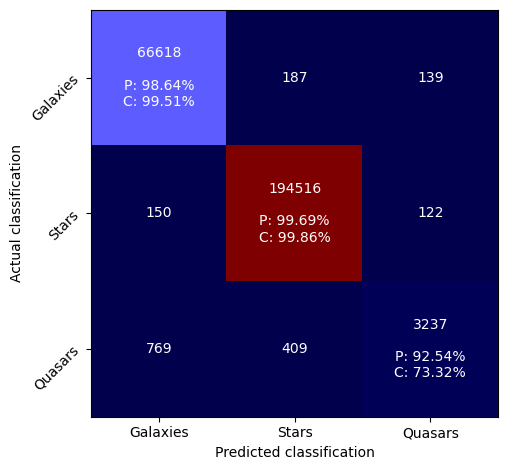

In [25]:
plt.imshow(confusion_matrix_r1, cmap=plt.get_cmap('seismic'))
plt.xlabel('Predicted classification')
plt.ylabel('Actual classification')
plt.xticks([0,1,2],['Galaxies','Stars','Quasars'])
plt.yticks([0,1,2],['Galaxies','Stars','Quasars'], rotation=45)

plt.text(0,0,str(confusion_matrix_r1[0,0])+'\n\n'+'P: '+str(galaxy_purity_r1)+'%'+'\n'+'C: '+str(galaxy_completeness_r1)+'%', color='w', ha='center', va='center')
plt.text(1,0,str(confusion_matrix_r1[0,1]), color='w', ha='center', va='center')
plt.text(2,0,str(confusion_matrix_r1[0,2]), color='w', ha='center', va='center')
plt.text(0,1,str(confusion_matrix_r1[1,0]), color='w', ha='center', va='center')
plt.text(1,1,str(confusion_matrix_r1[1,1])+'\n\n'+'P: '+str(star_purity_r1)+'%'+'\n'+'C: '+str(star_completeness_r1)+'%', color='w', ha='center', va='center')
plt.text(2,1,str(confusion_matrix_r1[1,2]), color='w', ha='center', va='center')
plt.text(0,2,str(confusion_matrix_r1[2,0]), color='w', ha='center', va='center')
plt.text(1,2,str(confusion_matrix_r1[2,1]), color='w', ha='center', va='center')
plt.text(2,2,str(confusion_matrix_r1[2,2])+'\n\n'+'P: '+str(qso_purity_r1)+'%'+'\n'+'C: '+str(qso_completeness_r1)+'%', color='w', ha='center', va='center')

#plt.colorbar()
#plt.grid(True)

plt.savefig('figs/confusion_r1.pdf', bbox_inches='tight')
plt.tight_layout()

In [26]:
confusion_matrix_r2 = confusion_matrix(y_test_r2['spCl'],vec_r2)

In [27]:
galaxy_total_r2 = confusion_matrix_r2[0,0]+confusion_matrix_r2[0,1]+confusion_matrix_r2[0,2]
star_total_r2 = confusion_matrix_r2[1,0]+confusion_matrix_r2[1,1]+confusion_matrix_r2[1,2]
qso_total_r2 = confusion_matrix_r2[2,0]+confusion_matrix_r2[2,1]+confusion_matrix_r2[2,2]

galaxy_predicted_r2 = confusion_matrix_r2[0,0]+confusion_matrix_r2[1,0]+confusion_matrix_r2[2,0]
star_predicted_r2 = confusion_matrix_r2[0,1]+confusion_matrix_r2[1,1]+confusion_matrix_r2[2,1]
qso_predicted_r2 = confusion_matrix_r2[0,2]+confusion_matrix_r2[1,2]+confusion_matrix_r2[2,2]

galaxy_purity_r2 = float(format(100*confusion_matrix_r2[0,0]/galaxy_predicted_r2,'.2f'))
star_purity_r2 = float(format(100*confusion_matrix_r2[1,1]/star_predicted_r2,'.2f'))
qso_purity_r2 = float(format(100*confusion_matrix_r2[2,2]/qso_predicted_r2,'.2f'))

galaxy_completeness_r2 = float(format(100*confusion_matrix_r2[0,0]/galaxy_total_r2,'.2f'))
star_completeness_r2 = float(format(100*confusion_matrix_r2[1,1]/star_total_r2,'.2f'))
qso_completeness_r2 = float(format(100*confusion_matrix_r2[2,2]/qso_total_r2,'.2f'))

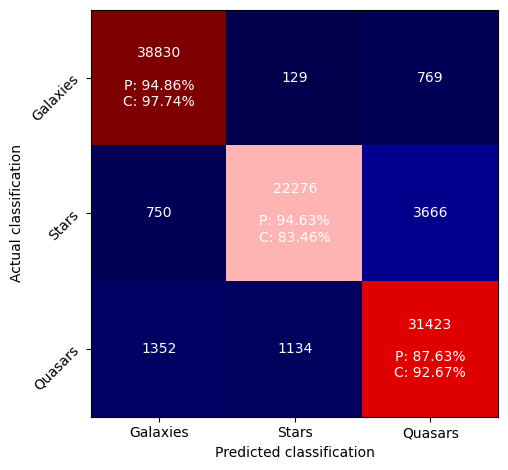

In [28]:
plt.imshow(confusion_matrix_r2, cmap=plt.get_cmap('seismic'))
plt.xlabel('Predicted classification')
plt.ylabel('Actual classification')
plt.xticks([0,1,2],['Galaxies','Stars','Quasars'])
plt.yticks([0,1,2],['Galaxies','Stars','Quasars'], rotation=45)

plt.text(0,0,str(confusion_matrix_r2[0,0])+'\n\n'+'P: '+str(galaxy_purity_r2)+'%'+'\n'+'C: '+str(galaxy_completeness_r2)+'%', color='w', ha='center', va='center')
plt.text(1,0,str(confusion_matrix_r2[0,1]), color='w', ha='center', va='center')
plt.text(2,0,str(confusion_matrix_r2[0,2]), color='w', ha='center', va='center')
plt.text(0,1,str(confusion_matrix_r2[1,0]), color='w', ha='center', va='center')
plt.text(1,1,str(confusion_matrix_r2[1,1])+'\n\n'+'P: '+str(star_purity_r2)+'%'+'\n'+'C: '+str(star_completeness_r2)+'%', color='w', ha='center', va='center')
plt.text(2,1,str(confusion_matrix_r2[1,2]), color='w', ha='center', va='center')
plt.text(0,2,str(confusion_matrix_r2[2,0]), color='w', ha='center', va='center')
plt.text(1,2,str(confusion_matrix_r2[2,1]), color='w', ha='center', va='center')
plt.text(2,2,str(confusion_matrix_r2[2,2])+'\n\n'+'P: '+str(qso_purity_r2)+'%'+'\n'+'C: '+str(qso_completeness_r2)+'%', color='w', ha='center', va='center')

#plt.colorbar()
#plt.grid(True)

plt.savefig('figs/confusion_r2.pdf', bbox_inches='tight')
plt.tight_layout()

In [29]:
confusion_matrix_r3 = confusion_matrix(y_test_r3['spCl'],vec_r3)

In [30]:
galaxy_total_r3 = confusion_matrix_r3[0,0]+confusion_matrix_r3[0,1]+confusion_matrix_r3[0,2]
star_total_r3 = confusion_matrix_r3[1,0]+confusion_matrix_r3[1,1]+confusion_matrix_r3[1,2]
qso_total_r3 = confusion_matrix_r3[2,0]+confusion_matrix_r3[2,1]+confusion_matrix_r3[2,2]

galaxy_predicted_r3 = confusion_matrix_r3[0,0]+confusion_matrix_r3[1,0]+confusion_matrix_r3[2,0]
star_predicted_r3 = confusion_matrix_r3[0,1]+confusion_matrix_r3[1,1]+confusion_matrix_r3[2,1]
qso_predicted_r3 = confusion_matrix_r3[0,2]+confusion_matrix_r3[1,2]+confusion_matrix_r3[2,2]

galaxy_purity_r3 = float(format(100*confusion_matrix_r3[0,0]/galaxy_predicted_r3,'.2f'))
star_purity_r3 = float(format(100*confusion_matrix_r3[1,1]/star_predicted_r3,'.2f'))
qso_purity_r3 = float(format(100*confusion_matrix_r3[2,2]/qso_predicted_r3,'.2f'))

galaxy_completeness_r3 = float(format(100*confusion_matrix_r3[0,0]/galaxy_total_r3,'.2f'))
star_completeness_r3 = float(format(100*confusion_matrix_r3[1,1]/star_total_r3,'.2f'))
qso_completeness_r3 = float(format(100*confusion_matrix_r3[2,2]/qso_total_r3,'.2f'))

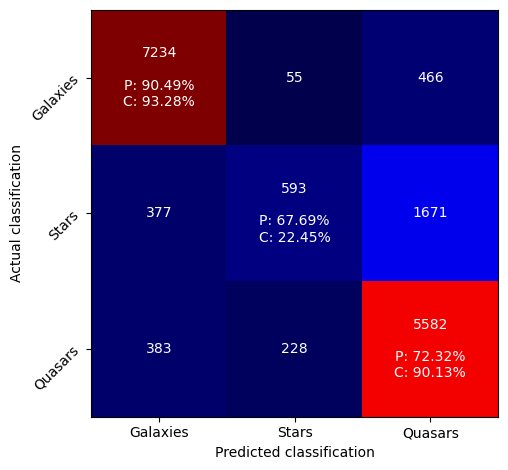

In [32]:
plt.imshow(confusion_matrix_r3, cmap=plt.get_cmap('seismic'))
plt.xlabel('Predicted classification')
plt.ylabel('Actual classification')
plt.xticks([0,1,2],['Galaxies','Stars','Quasars'])
plt.yticks([0,1,2],['Galaxies','Stars','Quasars'], rotation=45)

plt.text(0,0,str(confusion_matrix_r3[0,0])+'\n\n'+'P: '+str(galaxy_purity_r3)+'%'+'\n'+'C: '+str(galaxy_completeness_r3)+'%', color='w', ha='center', va='center')
plt.text(1,0,str(confusion_matrix_r3[0,1]), color='w', ha='center', va='center')
plt.text(2,0,str(confusion_matrix_r3[0,2]), color='w', ha='center', va='center')
plt.text(0,1,str(confusion_matrix_r3[1,0]), color='w', ha='center', va='center')
plt.text(1,1,str(confusion_matrix_r3[1,1])+'\n\n'+'P: '+str(star_purity_r3)+'%'+'\n'+'C: '+str(star_completeness_r3)+'%', color='w', ha='center', va='center')
plt.text(2,1,str(confusion_matrix_r3[1,2]), color='w', ha='center', va='center')
plt.text(0,2,str(confusion_matrix_r3[2,0]), color='w', ha='center', va='center')
plt.text(1,2,str(confusion_matrix_r3[2,1]), color='w', ha='center', va='center')
plt.text(2,2,str(confusion_matrix_r3[2,2])+'\n\n'+'P: '+str(qso_purity_r3)+'%'+'\n'+'C: '+str(qso_completeness_r3)+'%', color='w', ha='center', va='center')

#plt.colorbar()
#plt.grid(True)

plt.savefig('figs/confusion_r3.pdf', bbox_inches='tight')
plt.tight_layout()

Figure 6:

In [33]:
precision_galaxy_r1, recall_galaxy_r1, thresholds_galaxy_r1 = precision_recall_curve(y_test_ohe_r1[:, 0], xgboost_prob_r1[:, 0], pos_label=1)
precision_galaxy_r2, recall_galaxy_r2, thresholds_galaxy_r2 = precision_recall_curve(y_test_ohe_r2[:, 0], xgboost_prob_r2[:, 0], pos_label=1)
precision_galaxy_r3, recall_galaxy_r3, thresholds_galaxy_r3 = precision_recall_curve(y_test_ohe_r3[:, 0], xgboost_prob_r3[:, 0], pos_label=1)

f1_galaxy_r1 = 2*(precision_galaxy_r1[:-1]*recall_galaxy_r1[:-1])/(precision_galaxy_r1[:-1]+recall_galaxy_r1[:-1])
f1_galaxy_r2 = 2*(precision_galaxy_r2[:-1]*recall_galaxy_r2[:-1])/(precision_galaxy_r2[:-1]+recall_galaxy_r2[:-1])
f1_galaxy_r3 = 2*(precision_galaxy_r3[:-1]*recall_galaxy_r3[:-1])/(precision_galaxy_r3[:-1]+recall_galaxy_r3[:-1])

In [34]:
precision_star_r1, recall_star_r1, thresholds_star_r1 = precision_recall_curve(y_test_ohe_r1[:, 1], xgboost_prob_r1[:, 1], pos_label=1)
precision_star_r2, recall_star_r2, thresholds_star_r2 = precision_recall_curve(y_test_ohe_r2[:, 1], xgboost_prob_r2[:, 1], pos_label=1)
precision_star_r3, recall_star_r3, thresholds_star_r3 = precision_recall_curve(y_test_ohe_r3[:, 1], xgboost_prob_r3[:, 1], pos_label=1)

f1_star_r1 = 2*(precision_star_r1[:-1]*recall_star_r1[:-1])/(precision_star_r1[:-1]+recall_star_r1[:-1])
f1_star_r2 = 2*(precision_star_r2[:-1]*recall_star_r2[:-1])/(precision_star_r2[:-1]+recall_star_r2[:-1])
f1_star_r3 = 2*(precision_star_r3[:-1]*recall_star_r3[:-1])/(precision_star_r3[:-1]+recall_star_r3[:-1])

In [35]:
precision_qso_r1, recall_qso_r1, thresholds_qso_r1 = precision_recall_curve(y_test_ohe_r1[:, 2], xgboost_prob_r1[:, 2], pos_label=1)
precision_qso_r2, recall_qso_r2, thresholds_qso_r2 = precision_recall_curve(y_test_ohe_r2[:, 2], xgboost_prob_r2[:, 2], pos_label=1)
precision_qso_r3, recall_qso_r3, thresholds_qso_r3 = precision_recall_curve(y_test_ohe_r3[:, 2], xgboost_prob_r3[:, 2], pos_label=1)

f1_qso_r1 = 2*(precision_qso_r1[:-1]*recall_qso_r1[:-1])/(precision_qso_r1[:-1]+recall_qso_r1[:-1])
f1_qso_r2 = 2*(precision_qso_r2[:-1]*recall_qso_r2[:-1])/(precision_qso_r2[:-1]+recall_qso_r2[:-1])
f1_qso_r3 = 2*(precision_qso_r3[:-1]*recall_qso_r3[:-1])/(precision_qso_r3[:-1]+recall_qso_r3[:-1])

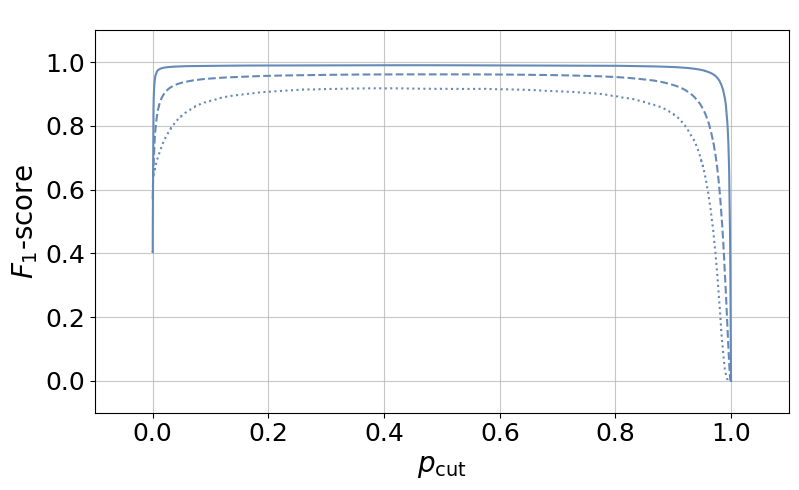

In [36]:
plt.figure(figsize=(5*(1+np.sqrt(5))/2,5))
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.7)
plt.xlabel(r'$p_{\rm cut}$', fontsize=20)
plt.ylabel(r'$F_1$-score', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.title(" ")

plt.plot(thresholds_galaxy_r1,f1_galaxy_r1, color='#668ab7', linestyle='-')
plt.plot(thresholds_galaxy_r2,f1_galaxy_r2, color='#668ab7', linestyle='--')
plt.plot(thresholds_galaxy_r3,f1_galaxy_r3, color='#668ab7', linestyle=':')

plt.savefig('figs/f1_galaxy.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show() 
plt.close()

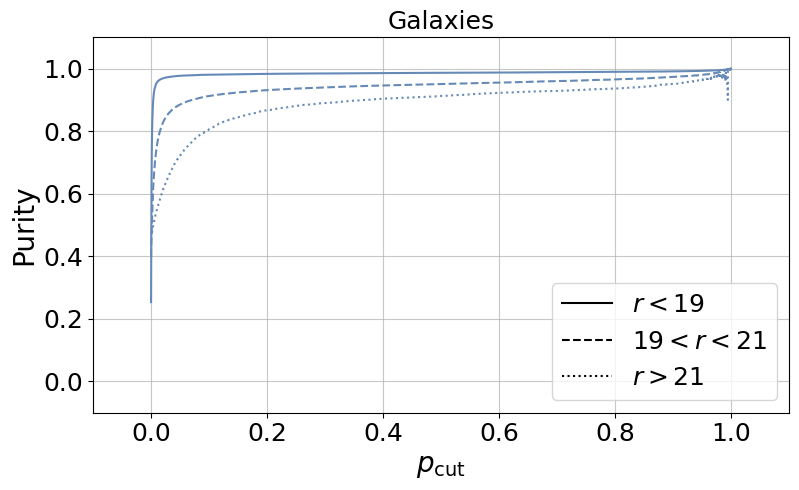

In [37]:
plt.figure(figsize=(5*(1+np.sqrt(5))/2,5))
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.7)
plt.xlabel(r'$p_{\rm cut}$', fontsize=20)
plt.ylabel(r'Purity', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.plot(thresholds_galaxy_r1,precision_galaxy_r1[:-1], color='#668ab7', linestyle='-')
plt.plot(thresholds_galaxy_r2,precision_galaxy_r2[:-1], color='#668ab7', linestyle='--')
plt.plot(thresholds_galaxy_r3,precision_galaxy_r3[:-1], color='#668ab7', linestyle=':')

plt.plot(thresholds_galaxy_r1,f1_galaxy_r1+100, color='k', linestyle='-',label=r'$r<19$')
plt.plot(thresholds_galaxy_r2,f1_galaxy_r2+100, color='k', linestyle='--',label=r'$19<r<21$')
plt.plot(thresholds_galaxy_r3,f1_galaxy_r3+100, color='k', linestyle=':', label=r'$r>21$')

plt.legend(loc='best', fontsize=18)

plt.title("Galaxies", fontsize=18)

plt.savefig('figs/purity_galaxy.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show() 
plt.close()

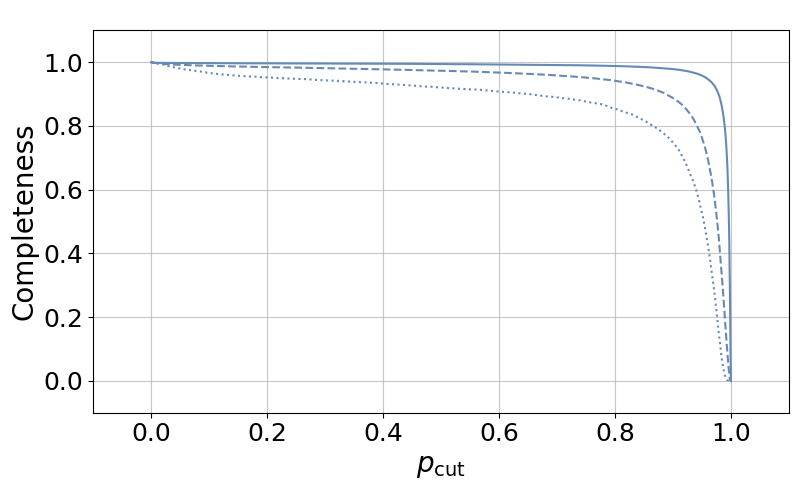

In [38]:
plt.figure(figsize=(5*(1+np.sqrt(5))/2,5))
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.7)
plt.xlabel(r'$p_{\rm cut}$', fontsize=20)
plt.ylabel(r'Completeness', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.plot(thresholds_galaxy_r1,recall_galaxy_r1[:-1], color='#668ab7', linestyle='-')
plt.plot(thresholds_galaxy_r2,recall_galaxy_r2[:-1], color='#668ab7', linestyle='--')
plt.plot(thresholds_galaxy_r3,recall_galaxy_r3[:-1], color='#668ab7', linestyle=':')

plt.title(" ")

plt.savefig('figs/completeness_galaxy.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show() 
plt.close()

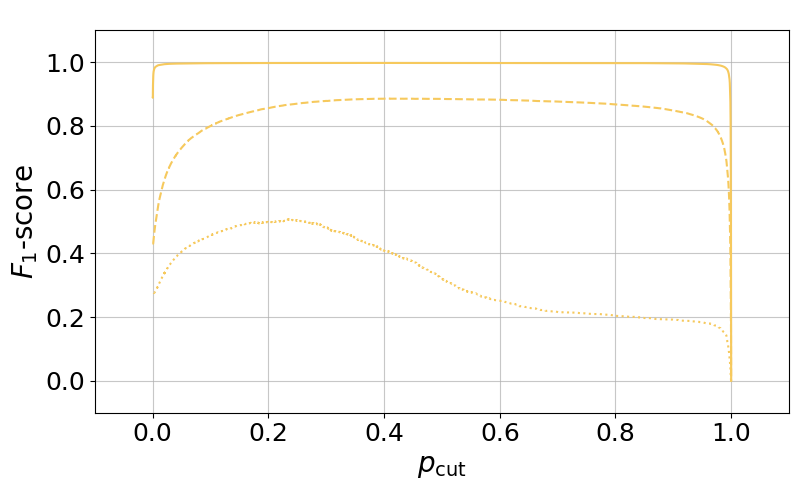

In [39]:
plt.figure(figsize=(5*(1+np.sqrt(5))/2,5))
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.7)
plt.xlabel(r'$p_{\rm cut}$', fontsize=20)
plt.ylabel(r'$F_1$-score', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.plot(thresholds_star_r1,f1_star_r1, color='#f6c95d', linestyle='-')
plt.plot(thresholds_star_r2,f1_star_r2, color='#f6c95d', linestyle='--')
plt.plot(thresholds_star_r3,f1_star_r3, color='#f6c95d', linestyle=':')

plt.title(" ")

plt.savefig('figs/f1_star.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show() 
plt.close()

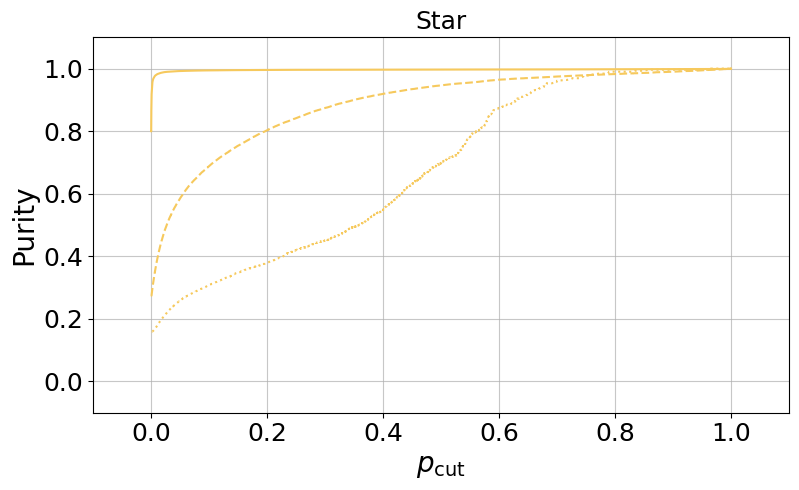

In [41]:
plt.figure(figsize=(5*(1+np.sqrt(5))/2,5))
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.7)
plt.xlabel(r'$p_{\rm cut}$', fontsize=20)
plt.ylabel(r'Purity', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.plot(thresholds_star_r1,precision_star_r1[:-1], color='#f6c95d', linestyle='-')
plt.plot(thresholds_star_r2,precision_star_r2[:-1], color='#f6c95d', linestyle='--')
plt.plot(thresholds_star_r3,precision_star_r3[:-1], color='#f6c95d', linestyle=':')

plt.title("Star", fontsize=18)

plt.savefig('figs/purity_star.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show() 
plt.close()

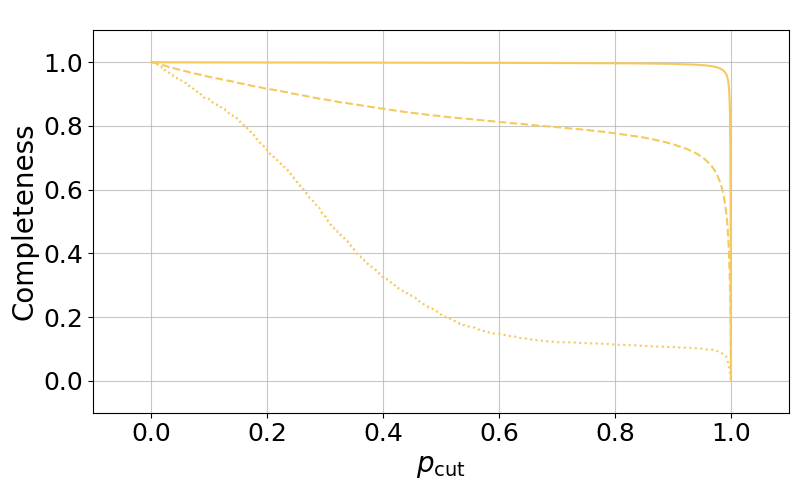

In [42]:
plt.figure(figsize=(5*(1+np.sqrt(5))/2,5))
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.7)
plt.xlabel(r'$p_{\rm cut}$', fontsize=20)
plt.ylabel(r'Completeness', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.plot(thresholds_star_r1,recall_star_r1[:-1], color='#f6c95d', linestyle='-')
plt.plot(thresholds_star_r2,recall_star_r2[:-1], color='#f6c95d', linestyle='--')
plt.plot(thresholds_star_r3,recall_star_r3[:-1], color='#f6c95d', linestyle=':')

plt.title(" ")

plt.savefig('figs/completeness_star.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show() 
plt.close()

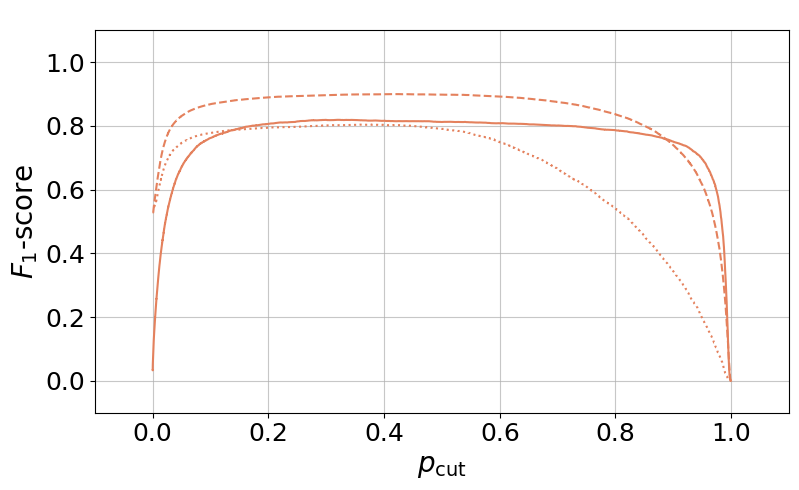

In [43]:
plt.figure(figsize=(5*(1+np.sqrt(5))/2,5))
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.7)
plt.xlabel(r'$p_{\rm cut}$', fontsize=20)
plt.ylabel(r'$F_1$-score', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.plot(thresholds_qso_r1,f1_qso_r1, color='#e4815d', linestyle='-')
plt.plot(thresholds_qso_r2,f1_qso_r2, color='#e4815d', linestyle='--')
plt.plot(thresholds_qso_r3,f1_qso_r3, color='#e4815d', linestyle=':')

plt.title(" ")

plt.savefig('figs/f1_qso.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show() 
plt.close()

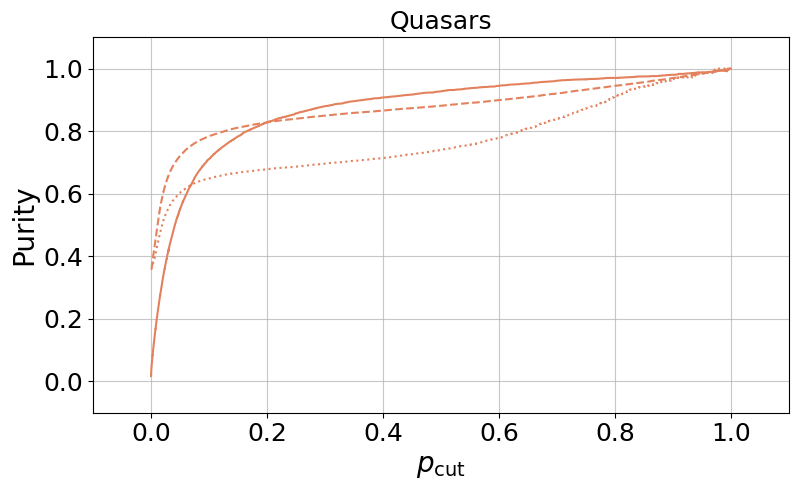

In [44]:
plt.figure(figsize=(5*(1+np.sqrt(5))/2,5))
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.7)
plt.xlabel(r'$p_{\rm cut}$', fontsize=20)
plt.ylabel(r'Purity', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.plot(thresholds_qso_r1,precision_qso_r1[:-1], color='#e4815d', linestyle='-')
plt.plot(thresholds_qso_r2,precision_qso_r2[:-1], color='#e4815d', linestyle='--')
plt.plot(thresholds_qso_r3,precision_qso_r3[:-1], color='#e4815d', linestyle=':')

plt.title("Quasars", fontsize=18)

plt.savefig('figs/purity_qso.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show() 
plt.close()

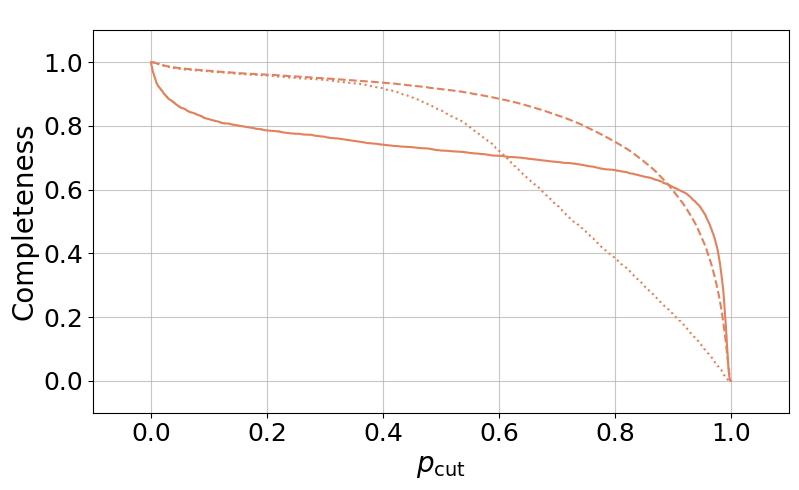

In [45]:
plt.figure(figsize=(5*(1+np.sqrt(5))/2,5))
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.7)
plt.xlabel(r'$p_{\rm cut}$', fontsize=20)
plt.ylabel(r'Completeness', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.plot(thresholds_qso_r1,recall_qso_r1[:-1], color='#e4815d', linestyle='-')
plt.plot(thresholds_qso_r2,recall_qso_r2[:-1], color='#e4815d', linestyle='--')
plt.plot(thresholds_qso_r3,recall_qso_r3[:-1], color='#e4815d', linestyle=':')

plt.title(" ")

plt.savefig('figs/completeness_qso.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show() 
plt.close()

Figure 7:

In [46]:
def find_purity_completeness_at(truth_test, clf, step=0.000001, pcom=None, ppur=None, ncom=None, npur=None):
    
    print("Finding the threshold value...")
    
    if bool(pcom) and bool(ncom) and bool(ppur) and bool(npur):
        raise Exception('Specify only one of ppur or npur parameter.')

    pbin = np.arange(0.001, 1, step)
    
    pure_all = np.zeros(len(pbin))
    comp_all = np.zeros(len(pbin))
    
    for i, p in enumerate(pbin):
        
        # true positive classified as negative
        PN = ((clf >= p) & (truth_test == 0)).sum()
        # true galaxies classified as galaxies
        PP = ((clf < p)  & (truth_test == 0)).sum()
        # true stars classified as galaxies
        NP = ((clf < p)  & (truth_test == 1)).sum()
        # true stars classified as stars
        NN = ((clf >= p) & (truth_test == 1)).sum()
    
        if pcom is not None or ppur is not None:
            if PP == 0 and NP == 0:
                pure_all[i] = np.nan
            else:
                pure_all[i] = PP / (PP + NP)
            if PP == 0 and PN == 0:
                comp_all[i] = np.nan
            else:
                comp_all[i] = PP / (PP + PN)
            
        if ncom is not None or npur is not None:
            if NN == 0 and NP == 0:
                comp_all[i] = np.nan
            else:
                comp_all[i] = NN / (NN + NP)
            if ss == 0 and gs == 0:
                pure_all[i] = np.nan
            else:
                pure_all[i] = NN / (NN + PN)
    
    if pcom is not None:
        ibin = np.argmin(np.abs(comp_all - pcom))
        return pbin[ibin], pure_all[ibin]
    
    if ppur is not None:
        ibin = np.argmin(np.abs(pure_all - ppur))
        return pbin[ibin], comp_all[ibin]
    
    if ncom is not None:
        ibin = np.argmin(np.abs(comp_all - ncom))
        return pbin[ibin], pure_all[ibin]
    
    if npur is not None:
        ibin = np.argmin(np.abs(pure_all - npur))
        return pbin[ibin], comp_all[ibin]

In [47]:
xgb_p_cut_purity_90_galaxy, _ = find_purity_completeness_at(1-y_test_ohe[:,0], 1-xgboost_prob[:,0], pcom=0.90, step=0.0001)
xgb_p_cut_purity_70_galaxy, _ = find_purity_completeness_at(1-y_test_ohe[:,0], 1-xgboost_prob[:,0], pcom=0.70, step=0.0001)
xgb_p_cut_completness_90_galaxy, _ = find_purity_completeness_at(1-y_test_ohe[:,0], 1-xgboost_prob[:,0], ppur=0.90, step=0.0001)
xgb_p_cut_completness_70_galaxy, _ = find_purity_completeness_at(1-y_test_ohe[:,0], 1-xgboost_prob[:,0], ppur=0.70, step=0.0001)

Finding the threshold value...
Finding the threshold value...
Finding the threshold value...
Finding the threshold value...


In [48]:
xgb_p_cut_purity_90_star, _ = find_purity_completeness_at(1-y_test_ohe[:,1], 1-xgboost_prob[:,1], pcom=0.90, step=0.0001)
xgb_p_cut_purity_70_star, _ = find_purity_completeness_at(1-y_test_ohe[:,1], 1-xgboost_prob[:,1], pcom=0.70, step=0.0001)
xgb_p_cut_completness_90_star, _ = find_purity_completeness_at(1-y_test_ohe[:,1], 1-xgboost_prob[:,1], ppur=0.90, step=0.0001)
xgb_p_cut_completness_70_star, _ = find_purity_completeness_at(1-y_test_ohe[:,1], 1-xgboost_prob[:,1], ppur=0.70, step=0.0001)

Finding the threshold value...
Finding the threshold value...
Finding the threshold value...
Finding the threshold value...


In [49]:
xgb_p_cut_purity_90_qso, _ = find_purity_completeness_at(1-y_test_ohe[:,2], 1-xgboost_prob[:,2], pcom=0.90, step=0.0001)
xgb_p_cut_purity_70_qso, _ = find_purity_completeness_at(1-y_test_ohe[:,2], 1-xgboost_prob[:,2], pcom=0.70, step=0.0001)
xgb_p_cut_completness_90_qso, _ = find_purity_completeness_at(1-y_test_ohe[:,2], 1-xgboost_prob[:,2], ppur=0.90, step=0.0001)
xgb_p_cut_completness_70_qso, _ = find_purity_completeness_at(1-y_test_ohe[:,2], 1-xgboost_prob[:,2], ppur=0.70, step=0.0001)

Finding the threshold value...
Finding the threshold value...
Finding the threshold value...
Finding the threshold value...


In [50]:
def calc_completeness_purity(truth, classif, mag, p_cut=0.1, bins=None): 
    
    result = {}
    
    p_comp_bin = np.zeros(len(bins))
    p_pur_bin = np.zeros(len(bins))
    n_comp_bin = np.zeros(len(bins))    
    n_pur_bin = np.zeros(len(bins))
    
    p_pur_lower_bin = np.zeros(len(bins))
    p_pur_upper_bin = np.zeros(len(bins))

    n_pur_upper_bin = np.zeros(len(bins))
    n_pur_lower_bin = np.zeros(len(bins))

    for i, b in enumerate(bins):
                
        # true galaxies classified as stars
        mask = (mag > -90) & (mag < b)
        pn_bin = ((classif[mask] >= p_cut) & (truth[mask] == 0)).sum().astype(np.float)
        # true galaxies classified as galaxies
        pp_bin = ((classif[mask] < p_cut) & (truth[mask] == 0)).sum().astype(np.float)
        # true stars classified as galaxies
        np_bin = ((classif[mask] < p_cut) & (truth[mask] == 1)).sum().astype(np.float)
        # true stars classified as stars
        nn_bin = ((classif[mask] >= p_cut) & (truth[mask] == 1)).sum().astype(np.float)

        # positive completeness
        p_comp_bin[i] = pp_bin / (pp_bin + pn_bin)    
        # galaxy purity
        p_pur_bin[i] = pp_bin / (pp_bin + np_bin)
        
        # negative completeness
        n_comp_bin[i] = nn_bin / (nn_bin + np_bin)

        n_pur_bin[i] = nn_bin / (nn_bin + pn_bin)
        
        #print("Calculating completenss for {0}...".format(b))

    
    result['positive_completeness'] = p_comp_bin
    result['positive_purity'] = p_pur_bin
    
    
    result['negative_completeness'] = n_comp_bin
    result['negative_purity'] = n_pur_bin
    
        
    return result

In [51]:
def calc_completeness_purity_diff(truth, classif, mag, p_cut=0.1, bins=None): 
    
    result = {}
    
    p_comp_bin = np.zeros(len(bins))
    p_pur_bin = np.zeros(len(bins))
    n_comp_bin = np.zeros(len(bins))    
    n_pur_bin = np.zeros(len(bins))
    
    p_pur_lower_bin = np.zeros(len(bins))
    p_pur_upper_bin = np.zeros(len(bins))

    n_pur_upper_bin = np.zeros(len(bins))
    n_pur_lower_bin = np.zeros(len(bins))

    for i, b in enumerate(bins):
                
        # true galaxies classified as stars
        mask = (mag > (b - 0.5)) & (mag < (b + 0.5))
        pn_bin = ((classif[mask] >= p_cut) & (truth[mask] == 0)).sum().astype(np.float)
        # true galaxies classified as galaxies
        pp_bin = ((classif[mask] < p_cut) & (truth[mask] == 0)).sum().astype(np.float)
        # true stars classified as galaxies
        np_bin = ((classif[mask] < p_cut) & (truth[mask] == 1)).sum().astype(np.float)
        # true stars classified as stars
        nn_bin = ((classif[mask] >= p_cut) & (truth[mask] == 1)).sum().astype(np.float)

        # positive completeness
        p_comp_bin[i] = pp_bin / (pp_bin + pn_bin)    
        # galaxy purity
        p_pur_bin[i] = pp_bin / (pp_bin + np_bin)
        
        # negative completeness
        n_comp_bin[i] = nn_bin / (nn_bin + np_bin)

        n_pur_bin[i] = nn_bin / (nn_bin + pn_bin)
        
        #print("Calculating completenss for {0}...".format(b))

    
    result['positive_completeness'] = p_comp_bin
    result['positive_purity'] = p_pur_bin
    
    
    result['negative_completeness'] = n_comp_bin
    result['negative_purity'] = n_pur_bin
    
        
    return result

In [52]:
hist_bins = [16,17,18,19,20,21,22,23]
mag_r_test = x_test['rSDSS']

In [53]:
xgb_purity_90_galaxy = calc_completeness_purity(1-y_test_ohe[:,0], 1-xgboost_prob[:,0],  mag_r_test, p_cut=xgb_p_cut_purity_90_galaxy , bins=hist_bins)
xgb_purity_70_galaxy = calc_completeness_purity(1-y_test_ohe[:,0], 1-xgboost_prob[:,0],  mag_r_test, p_cut=xgb_p_cut_purity_70_galaxy , bins=hist_bins)
xgb_completeness_90_galaxy = calc_completeness_purity(1-y_test_ohe[:,0], 1-xgboost_prob[:,0],  mag_r_test, p_cut=xgb_p_cut_completness_90_galaxy , bins=hist_bins)
xgb_completeness_70_galaxy = calc_completeness_purity(1-y_test_ohe[:,0], 1-xgboost_prob[:,0],  mag_r_test, p_cut=xgb_p_cut_completness_70_galaxy , bins=hist_bins)

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/699686114.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pn_bin = ((classif[mask] >= p_cut) & (truth[mask] == 0)).sum().astype(np.float)
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/699686114.py:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pp_b

In [54]:
xgb_purity_90_galaxy_diff = calc_completeness_purity_diff(1-y_test_ohe[:,0], 1-xgboost_prob[:,0],  mag_r_test, p_cut=xgb_p_cut_purity_90_galaxy , bins=hist_bins)
xgb_purity_70_galaxy_diff = calc_completeness_purity_diff(1-y_test_ohe[:,0], 1-xgboost_prob[:,0],  mag_r_test, p_cut=xgb_p_cut_purity_70_galaxy , bins=hist_bins)
xgb_completeness_90_galaxy_diff = calc_completeness_purity_diff(1-y_test_ohe[:,0], 1-xgboost_prob[:,0],  mag_r_test, p_cut=xgb_p_cut_completness_90_galaxy , bins=hist_bins)
xgb_completeness_70_galaxy_diff = calc_completeness_purity_diff(1-y_test_ohe[:,0], 1-xgboost_prob[:,0],  mag_r_test, p_cut=xgb_p_cut_completness_70_galaxy , bins=hist_bins)

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/2002512509.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pn_bin = ((classif[mask] >= p_cut) & (truth[mask] == 0)).sum().astype(np.float)
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/2002512509.py:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pp

In [55]:
xgb_purity_90_star = calc_completeness_purity(1-y_test_ohe[:,1], 1-xgboost_prob[:,1],  mag_r_test, p_cut=xgb_p_cut_purity_90_star , bins=hist_bins)
xgb_purity_70_star = calc_completeness_purity(1-y_test_ohe[:,1], 1-xgboost_prob[:,1],  mag_r_test, p_cut=xgb_p_cut_purity_70_star , bins=hist_bins)
xgb_completeness_90_star = calc_completeness_purity(1-y_test_ohe[:,1], 1-xgboost_prob[:,1],  mag_r_test, p_cut=xgb_p_cut_completness_90_star , bins=hist_bins)
xgb_completeness_70_star = calc_completeness_purity(1-y_test_ohe[:,1], 1-xgboost_prob[:,1],  mag_r_test, p_cut=xgb_p_cut_completness_70_star , bins=hist_bins)

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/699686114.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pn_bin = ((classif[mask] >= p_cut) & (truth[mask] == 0)).sum().astype(np.float)
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/699686114.py:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pp_b

In [56]:
xgb_purity_90_star_diff = calc_completeness_purity_diff(1-y_test_ohe[:,1], 1-xgboost_prob[:,1],  mag_r_test, p_cut=xgb_p_cut_purity_90_star , bins=hist_bins)
xgb_purity_70_star_diff = calc_completeness_purity_diff(1-y_test_ohe[:,1], 1-xgboost_prob[:,1],  mag_r_test, p_cut=xgb_p_cut_purity_70_star , bins=hist_bins)
xgb_completeness_90_star_diff = calc_completeness_purity_diff(1-y_test_ohe[:,1], 1-xgboost_prob[:,1],  mag_r_test, p_cut=xgb_p_cut_completness_90_star , bins=hist_bins)
xgb_completeness_70_star_diff = calc_completeness_purity_diff(1-y_test_ohe[:,1], 1-xgboost_prob[:,1],  mag_r_test, p_cut=xgb_p_cut_completness_70_star , bins=hist_bins)

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/2002512509.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pn_bin = ((classif[mask] >= p_cut) & (truth[mask] == 0)).sum().astype(np.float)
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/2002512509.py:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pp

In [57]:
xgb_purity_90_qso = calc_completeness_purity(1-y_test_ohe[:,2], 1-xgboost_prob[:,2],  mag_r_test, p_cut=xgb_p_cut_purity_90_qso , bins=hist_bins)
xgb_purity_70_qso = calc_completeness_purity(1-y_test_ohe[:,2], 1-xgboost_prob[:,2],  mag_r_test, p_cut=xgb_p_cut_purity_70_qso , bins=hist_bins)
xgb_completeness_90_qso = calc_completeness_purity(1-y_test_ohe[:,2], 1-xgboost_prob[:,2],  mag_r_test, p_cut=xgb_p_cut_completness_90_qso , bins=hist_bins)
xgb_completeness_70_qso = calc_completeness_purity(1-y_test_ohe[:,2], 1-xgboost_prob[:,2],  mag_r_test, p_cut=xgb_p_cut_completness_70_qso , bins=hist_bins)

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/699686114.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pn_bin = ((classif[mask] >= p_cut) & (truth[mask] == 0)).sum().astype(np.float)
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/699686114.py:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pp_b

In [58]:
xgb_purity_90_qso_diff = calc_completeness_purity_diff(1-y_test_ohe[:,2], 1-xgboost_prob[:,2],  mag_r_test, p_cut=xgb_p_cut_purity_90_qso , bins=hist_bins)
xgb_purity_70_qso_diff = calc_completeness_purity_diff(1-y_test_ohe[:,2], 1-xgboost_prob[:,2],  mag_r_test, p_cut=xgb_p_cut_purity_70_qso , bins=hist_bins)
xgb_completeness_90_qso_diff = calc_completeness_purity_diff(1-y_test_ohe[:,2], 1-xgboost_prob[:,2],  mag_r_test, p_cut=xgb_p_cut_completness_90_qso , bins=hist_bins)
xgb_completeness_70_qso_diff = calc_completeness_purity_diff(1-y_test_ohe[:,2], 1-xgboost_prob[:,2],  mag_r_test, p_cut=xgb_p_cut_completness_70_qso , bins=hist_bins)

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/2002512509.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pn_bin = ((classif[mask] >= p_cut) & (truth[mask] == 0)).sum().astype(np.float)
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/2002512509.py:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pp

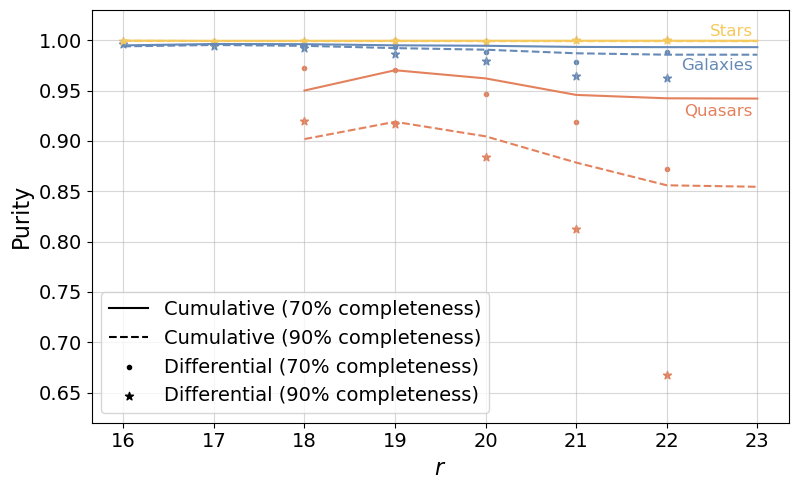

In [60]:
plt.figure(figsize=(5*(1+np.sqrt(5))/2,5))
plt.ylim([0.62, 1.03])
plt.ylabel('Purity',fontsize=16)
plt.xlabel(r'$r$',fontsize=16)

plt.plot(hist_bins, xgb_purity_90_galaxy['positive_purity'], color='#668ab7', linestyle='--', linewidth=1.5, markersize=3)
plt.plot(hist_bins, xgb_purity_70_galaxy['positive_purity'], color='#668ab7', linestyle='-', linewidth=1.5, markersize=3)
plt.scatter(hist_bins[:-1], xgb_purity_90_galaxy_diff['positive_purity'][:-1], color='#668ab7', marker='*')
plt.scatter(hist_bins[:-1], xgb_purity_70_galaxy_diff['positive_purity'][:-1], color='#668ab7', marker='.')

plt.plot(hist_bins, xgb_purity_90_star['positive_purity'], color='#f6c95d', linestyle='--', linewidth=1.5, markersize=3)
plt.plot(hist_bins, xgb_purity_70_star['positive_purity'], color='#f6c95d', linestyle='-', linewidth=1.5, markersize=3)
plt.scatter(hist_bins[:-1], xgb_purity_90_star_diff['positive_purity'][:-1], color='#f6c95d', marker='*')
plt.scatter(hist_bins[:-1], xgb_purity_70_star_diff['positive_purity'][:-1], color='#f6c95d', marker='.')

plt.plot(hist_bins[2:], xgb_purity_90_qso['positive_purity'][2:], color='#e4815d', linestyle='--', linewidth=1.5, markersize=3)
plt.plot(hist_bins[2:], xgb_purity_70_qso['positive_purity'][2:], color='#e4815d', linestyle='-', linewidth=1.5, markersize=3)
plt.scatter(hist_bins[2:-1], xgb_purity_90_qso_diff['positive_purity'][2:-1], color='#e4815d', marker='*')
plt.scatter(hist_bins[2:-1], xgb_purity_70_qso_diff['positive_purity'][2:-1], color='#e4815d', marker='.')

plt.plot(hist_bins, xgb_purity_90_galaxy['positive_purity']+100, color='k', linestyle='-', label=r'Cumulative (70% completeness)')
plt.plot(hist_bins, xgb_purity_90_galaxy['positive_purity']+100, color='k', linestyle='--', label=r'Cumulative (90% completeness)')
plt.scatter(hist_bins[:-1], xgb_purity_90_star_diff['positive_purity'][:-1]+100, color='k', marker='.', label=r'Differential (70% completeness)')
plt.scatter(hist_bins[:-1], xgb_purity_90_star_diff['positive_purity'][:-1]+100, color='k', marker='*', label=r'Differential (90% completeness)')

plt.legend(loc='best', fontsize=14)

plt.text(22.95,0.982,r'Galaxies',ha='right', va='top',color='#668ab7',fontsize=12)
plt.text(22.95,1.001,r'Stars',ha='right', va='bottom',color='#f6c95d',fontsize=12)
plt.text(22.95,0.937,r'Quasars',ha='right', va='top',color='#e4815d',fontsize=12)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(alpha=0.5)

plt.tight_layout()
plt.savefig('figs/purity_r.pdf', bbox_inches='tight')

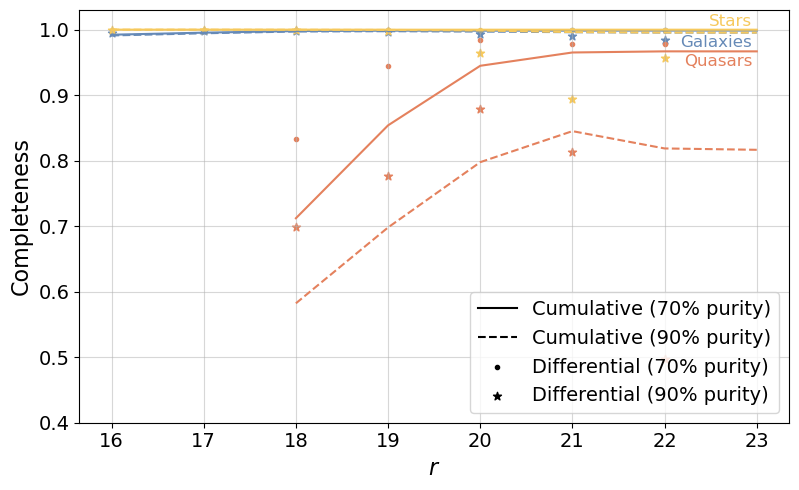

In [61]:
plt.figure(figsize=(5*(1+np.sqrt(5))/2,5))
plt.ylim([0.4, 1.03])
plt.ylabel('Completeness',fontsize=16)
plt.xlabel(r'$r$',fontsize=16)

plt.plot(hist_bins, xgb_completeness_90_galaxy['positive_completeness'], color='#668ab7', linestyle='--', linewidth=1.5, markersize=3)
plt.plot(hist_bins, xgb_completeness_70_galaxy['positive_completeness'], color='#668ab7', linestyle='-', linewidth=1.5, markersize=3)
plt.scatter(hist_bins[:-1], xgb_completeness_90_galaxy_diff['positive_completeness'][:-1], color='#668ab7', marker='*')
plt.scatter(hist_bins[:-1], xgb_completeness_70_galaxy_diff['positive_completeness'][:-1], color='#668ab7', marker='.')

plt.plot(hist_bins, xgb_completeness_90_star['positive_completeness'], color='#f6c95d', linestyle='--', linewidth=1.5, markersize=3)
plt.plot(hist_bins, xgb_completeness_70_star['positive_completeness'], color='#f6c95d', linestyle='-', linewidth=1.5, markersize=3)
plt.scatter(hist_bins[:-1], xgb_completeness_90_star_diff['positive_completeness'][:-1], color='#f6c95d', marker='*')
plt.scatter(hist_bins[:-1], xgb_completeness_70_star_diff['positive_completeness'][:-1], color='#f6c95d', marker='.')

plt.plot(hist_bins[2:], xgb_completeness_90_qso['positive_completeness'][2:], color='#e4815d', linestyle='--', linewidth=1.5, markersize=3)
plt.plot(hist_bins[2:], xgb_completeness_70_qso['positive_completeness'][2:], color='#e4815d', linestyle='-', linewidth=1.5, markersize=3)
plt.scatter(hist_bins[2:-1], xgb_completeness_90_qso_diff['positive_completeness'][2:-1], color='#e4815d', marker='*')
plt.scatter(hist_bins[2:-1], xgb_completeness_70_qso_diff['positive_completeness'][2:-1], color='#e4815d', marker='.')

plt.plot(hist_bins, xgb_completeness_90_galaxy['positive_completeness']+100, color='k', linestyle='-', label=r'Cumulative (70% purity)')
plt.plot(hist_bins, xgb_completeness_90_galaxy['positive_completeness']+100, color='k', linestyle='--', label=r'Cumulative (90% purity)')
plt.scatter(hist_bins[:-1], xgb_completeness_90_star_diff['positive_completeness'][:-1]+100, color='k', marker='.', label=r'Differential (70% purity)')
plt.scatter(hist_bins[:-1], xgb_completeness_90_star_diff['positive_completeness'][:-1]+100, color='k', marker='*', label=r'Differential (90% purity)')

plt.legend(loc='best', fontsize=14)

plt.text(22.95,0.992,r'Galaxies',ha='right', va='top',color='#668ab7',fontsize=12)
plt.text(22.95,1.001,r'Stars',ha='right', va='bottom',color='#f6c95d',fontsize=12)
plt.text(22.95,0.963,r'Quasars',ha='right', va='top',color='#e4815d',fontsize=12)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(alpha=0.5)

plt.tight_layout()
plt.savefig('figs/completeness_r.pdf', bbox_inches='tight')

Figure 8

In [62]:
df_locus = x_test[x_test["rSDSS"].between(-40,40, inclusive=True)][x_test["iSDSS"].between(-40,40, inclusive=True)][x_test["gSDSS"].between(-40,40, inclusive=True)][y_test.spCl==1]
df_locus = df_locus[(df_locus.rSDSS - df_locus.iSDSS).between(-0.5,2, inclusive=True)][(df_locus.gSDSS - df_locus.rSDSS).between(-0.5,2, inclusive=True)]

df_locus_i = (df_locus.rSDSS - df_locus.iSDSS)
df_locus_g = df_locus.gSDSS - df_locus.rSDSS

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/125492016.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df_locus = x_test[x_test["rSDSS"].between(-40,40, inclusive=True)][x_test["iSDSS"].between(-40,40, inclusive=True)][x_test["gSDSS"].between(-40,40, inclusive=True)][y_test.spCl==1]
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/125492016.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_locus = x_test[x_test["rSDSS"].between(-40,40, inclusive=True)][x_test["iSDSS"].between(-40,40, inclusive=True)][x_test["gSDSS"].between(-40,40, inclusive=True)][y_test.spCl==1]
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/125492016.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df_locus = df_locus[(df_locus.rSDSS - df_locus.iSDSS).between(-0.5,2, inclusive=True)][(df_locus.gS

In [63]:
df_locus_i_r1 = df_locus_i[mask_r1]
df_locus_g_r1 = df_locus_g[mask_r1]

df_locus_i_r2 = df_locus_i[mask_r2]
df_locus_g_r2 = df_locus_g[mask_r2]

df_locus_i_r3 = df_locus_i[mask_r3]
df_locus_g_r3 = df_locus_g[mask_r3]

In [64]:
# calculate polynomial
z = np.polyfit(df_locus_i, df_locus_g, 5)
f = np.poly1d(z)

x_new = np.linspace(-0.0, 2, 50)
y_new = f(x_new)

In [65]:
data_r1 = pd.DataFrame({'CLASS_STAR': y_test['CLASS_STAR'][mask_r1], 'SGLC': y_test['SGLC'][mask_r1],'SDSS': y_test_ohe[:, 1][mask_r1],'XGB': xgboost_prob[:, 1][mask_r1],'r': x_test['rSDSS'][mask_r1],\
'g-r': x_test['gSDSS'][mask_r1]-x_test['rSDSS'][mask_r1], 'r-i': x_test['rSDSS'][mask_r1]-x_test['iSDSS'][mask_r1]}) 

#reordening columns
data_r1 = data_r1[['SDSS','SGLC','CLASS_STAR','XGB','r','g-r','r-i']]

# dataframe ML
df_sglc_r1 = data_r1[data_r1['g-r'].between(0,2, inclusive=True)][data_r1['r-i'].between(0,2, inclusive=True)][data_r1['SGLC']>=0.5]
df_class_r1 = data_r1[data_r1['g-r'].between(0,2, inclusive=True)][data_r1['r-i'].between(0,2, inclusive=True)][data_r1['CLASS_STAR']>=0.5]
df_xgb_r1 = data_r1[data_r1['g-r'].between(0,2, inclusive=True)][data_r1['r-i'].between(0,2, inclusive=True)][data_r1['XGB']>0.5]

y_sglc_r1 = df_sglc_r1['g-r']
x_sglc_r1 = df_sglc_r1['r-i']

mean_sglc_r1 = stats.binned_statistic(x_sglc_r1, y_sglc_r1, statistic='mean', bins=9, range=None)
std_sglc_r1  = stats.binned_statistic(x_sglc_r1, y_sglc_r1, statistic='std', bins=9, range=None)

y_class_r1 = df_class_r1['g-r']
x_class_r1 = df_class_r1['r-i']

mean_class_r1 = stats.binned_statistic(x_class_r1, y_class_r1, statistic='mean', bins=9, range=None)
std_class_r1  = stats.binned_statistic(x_class_r1, y_class_r1, statistic='std', bins=9, range=None)

y_xgb_r1 = df_xgb_r1['g-r']
x_xgb_r1 = df_xgb_r1['r-i']

mean_xgb_r1 = stats.binned_statistic(x_xgb_r1, y_xgb_r1, statistic='mean', bins=9, range=None)
std_xgb_r1  = stats.binned_statistic(x_xgb_r1, y_xgb_r1, statistic='std', bins=9, range=None)

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/2936025404.py:8: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df_sglc_r1 = data_r1[data_r1['g-r'].between(0,2, inclusive=True)][data_r1['r-i'].between(0,2, inclusive=True)][data_r1['SGLC']>=0.5]
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/2936025404.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sglc_r1 = data_r1[data_r1['g-r'].between(0,2, inclusive=True)][data_r1['r-i'].between(0,2, inclusive=True)][data_r1['SGLC']>=0.5]
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/2936025404.py:9: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df_class_r1 = data_r1[data_r1['g-r'].between(0,2, inclusive=True)][data_r1['r-i'].between(0,2, inclusive=True)][data_r1['CLASS_STAR']>=0.5]
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipy

In [66]:
data_r2 = pd.DataFrame({'CLASS_STAR': y_test['CLASS_STAR'][mask_r2], 'SGLC': y_test['SGLC'][mask_r2],'SDSS': y_test_ohe[:, 1][mask_r2],'XGB': xgboost_prob[:, 1][mask_r2],'r': x_test['rSDSS'][mask_r2],\
'g-r': x_test['gSDSS'][mask_r2]-x_test['rSDSS'][mask_r2], 'r-i': x_test['rSDSS'][mask_r2]-x_test['iSDSS'][mask_r2]}) 

#reordening columns
data_r2 = data_r2[['SDSS','SGLC','CLASS_STAR','XGB','r','g-r','r-i']]

# dataframe ML
df_sglc_r2 = data_r2[data_r2['g-r'].between(0,2, inclusive=True)][data_r2['r-i'].between(0,2, inclusive=True)][data_r2['SGLC']>=0.5]
df_class_r2 = data_r2[data_r2['g-r'].between(0,2, inclusive=True)][data_r2['r-i'].between(0,2, inclusive=True)][data_r2['CLASS_STAR']>=0.5]
df_xgb_r2 = data_r2[data_r2['g-r'].between(0,2, inclusive=True)][data_r2['r-i'].between(0,2, inclusive=True)][data_r2['XGB']>0.5]

y_sglc_r2 = df_sglc_r2['g-r']
x_sglc_r2 = df_sglc_r2['r-i']

mean_sglc_r2 = stats.binned_statistic(x_sglc_r2, y_sglc_r2, statistic='mean', bins=9, range=None)
std_sglc_r2  = stats.binned_statistic(x_sglc_r2, y_sglc_r2, statistic='std', bins=9, range=None)

y_class_r2 = df_class_r2['g-r']
x_class_r2 = df_class_r2['r-i']

mean_class_r2 = stats.binned_statistic(x_class_r2, y_class_r2, statistic='mean', bins=9, range=None)
std_class_r2  = stats.binned_statistic(x_class_r2, y_class_r2, statistic='std', bins=9, range=None)

y_xgb_r2 = df_xgb_r2['g-r']
x_xgb_r2 = df_xgb_r2['r-i']

mean_xgb_r2 = stats.binned_statistic(x_xgb_r2, y_xgb_r2, statistic='mean', bins=9, range=None)
std_xgb_r2  = stats.binned_statistic(x_xgb_r2, y_xgb_r2, statistic='std', bins=9, range=None)

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/823365454.py:8: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df_sglc_r2 = data_r2[data_r2['g-r'].between(0,2, inclusive=True)][data_r2['r-i'].between(0,2, inclusive=True)][data_r2['SGLC']>=0.5]
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/823365454.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sglc_r2 = data_r2[data_r2['g-r'].between(0,2, inclusive=True)][data_r2['r-i'].between(0,2, inclusive=True)][data_r2['SGLC']>=0.5]
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/823365454.py:9: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df_class_r2 = data_r2[data_r2['g-r'].between(0,2, inclusive=True)][data_r2['r-i'].between(0,2, inclusive=True)][data_r2['CLASS_STAR']>=0.5]
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipyker

In [67]:
data_r3 = pd.DataFrame({'CLASS_STAR': y_test['CLASS_STAR'][mask_r3], 'SGLC': y_test['SGLC'][mask_r3],'SDSS': y_test_ohe[:, 1][mask_r3],'XGB': xgboost_prob[:, 1][mask_r3],'r': x_test['rSDSS'][mask_r3],\
'g-r': x_test['gSDSS'][mask_r3]-x_test['rSDSS'][mask_r3], 'r-i': x_test['rSDSS'][mask_r3]-x_test['iSDSS'][mask_r3]}) 

#reordening columns
data_r3 = data_r3[['SDSS','SGLC','CLASS_STAR','XGB','r','g-r','r-i']]

# dataframe ML
df_sglc_r3 = data_r3[data_r3['g-r'].between(0,2, inclusive=True)][data_r3['r-i'].between(0,2, inclusive=True)][data_r3['SGLC']>=0.8]
df_class_r3 = data_r3[data_r3['g-r'].between(0,2, inclusive=True)][data_r3['r-i'].between(0,2, inclusive=True)][data_r3['CLASS_STAR']>=0.8]
df_xgb_r3 = data_r3[data_r3['g-r'].between(0,2, inclusive=True)][data_r3['r-i'].between(0,2, inclusive=True)][data_r3['XGB']>0.8]

y_sglc_r3 = df_sglc_r3['g-r']
x_sglc_r3 = df_sglc_r3['r-i']

mean_sglc_r3 = stats.binned_statistic(x_sglc_r3, y_sglc_r3, statistic='mean', bins=9, range=None)
std_sglc_r3  = stats.binned_statistic(x_sglc_r3, y_sglc_r3, statistic='std', bins=9, range=None)

y_class_r3 = df_class_r3['g-r']
x_class_r3 = df_class_r3['r-i']

mean_class_r3 = stats.binned_statistic(x_class_r3, y_class_r3, statistic='mean', bins=9, range=None)
std_class_r3  = stats.binned_statistic(x_class_r3, y_class_r3, statistic='std', bins=9, range=None)

y_xgb_r3 = df_xgb_r3['g-r']
x_xgb_r3 = df_xgb_r3['r-i']

mean_xgb_r3 = stats.binned_statistic(x_xgb_r3, y_xgb_r3, statistic='mean', bins=9, range=None)
std_xgb_r3  = stats.binned_statistic(x_xgb_r3, y_xgb_r3, statistic='std', bins=9, range=None)

/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/607892682.py:8: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df_sglc_r3 = data_r3[data_r3['g-r'].between(0,2, inclusive=True)][data_r3['r-i'].between(0,2, inclusive=True)][data_r3['SGLC']>=0.8]
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/607892682.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sglc_r3 = data_r3[data_r3['g-r'].between(0,2, inclusive=True)][data_r3['r-i'].between(0,2, inclusive=True)][data_r3['SGLC']>=0.8]
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipykernel_37055/607892682.py:9: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df_class_r3 = data_r3[data_r3['g-r'].between(0,2, inclusive=True)][data_r3['r-i'].between(0,2, inclusive=True)][data_r3['CLASS_STAR']>=0.8]
/var/folders/18/mh1b5q51229g008vd7s7r97c0000gn/T/ipyker

In [68]:
cmap = copy.copy(cm.get_cmap("YlOrRd"))
cmap.set_under(alpha=0)

/Users/rodrigovonmarttens/opt/anaconda3/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/Users/rodrigovonmarttens/opt/anaconda3/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


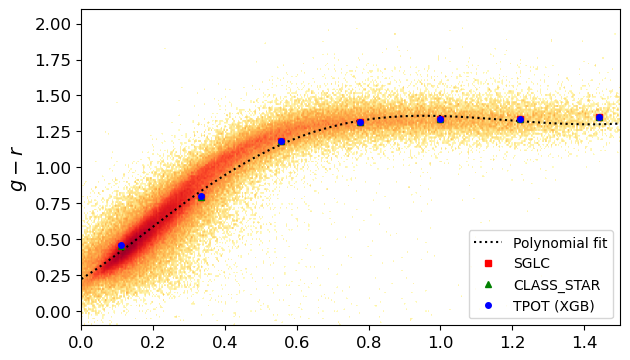

In [69]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
norm_r1 = ImageNormalize(vmin=0.5, vmax=500, stretch=LogStretch())

plt.plot(x_new,y_new,color='k',linestyle=':', label='Polynomial fit')
ax.scatter_density(df_locus_i_r1, df_locus_g_r1, cmap=cmap, norm=norm_r1)

ax.errorbar((mean_sglc_r1[1][1:] + mean_sglc_r1[1][:-1])/2, mean_sglc_r1[0],  fmt='s', mfc='red', ecolor='red', mec='red', ms=4, label='SGLC') # understand yerr=std_ML, 
ax.errorbar((mean_class_r1[1][1:] + mean_class_r1[1][:-1])/2, mean_class_r1[0],  fmt='^', mfc='green', ecolor='green', mec='green', ms=4, label='CLASS_STAR') # understand yerr=std_ML, 
plt.errorbar((mean_xgb_r1[1][1:] + mean_xgb_r1[1][:-1])/2, mean_xgb_r1[0],  fmt='o', mfc='blue', ecolor='blue', mec='blue', ms=4, label='TPOT (XGB)') # understand yerr=std_ML, 

ax.set_aspect(0.4)

plt.xlabel("")
plt.ylabel(r'$g-r$', fontsize=14)
plt.legend(loc='lower right')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(0,1.5)
plt.ylim(-0.1,2.1)

plt.tight_layout()
plt.savefig('figs/locus_r1.pdf', bbox_inches='tight')

/Users/rodrigovonmarttens/opt/anaconda3/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/Users/rodrigovonmarttens/opt/anaconda3/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


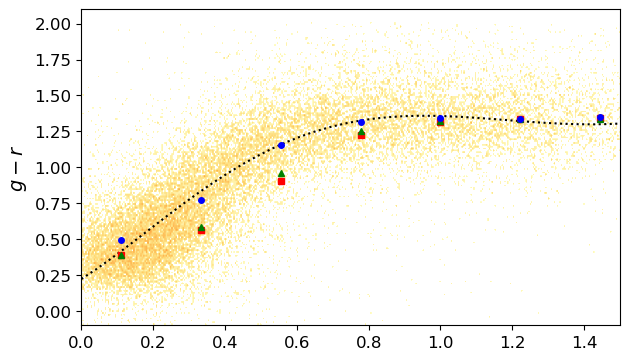

In [70]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
norm_r2 = ImageNormalize(vmin=0.5, vmax=500, stretch=LogStretch())

plt.plot(x_new,y_new,color='k',linestyle=':', label='Polynomial fit')
ax.scatter_density(df_locus_i_r2, df_locus_g_r2, cmap=cmap, norm=norm_r2)

ax.errorbar((mean_sglc_r2[1][1:] + mean_sglc_r2[1][:-1])/2, mean_sglc_r2[0],  fmt='s', mfc='red', ecolor='red', mec='red', ms=4, label='SGLC') # understand yerr=std_ML, 
ax.errorbar((mean_class_r2[1][1:] + mean_class_r2[1][:-1])/2, mean_class_r2[0],  fmt='^', mfc='green', ecolor='green', mec='green', ms=4, label='CLASS_STAR') # understand yerr=std_ML, 
plt.errorbar((mean_xgb_r2[1][1:] + mean_xgb_r2[1][:-1])/2, mean_xgb_r2[0],  fmt='o', mfc='blue', ecolor='blue', mec='blue', ms=4, label='TPOT (XGB)') # understand yerr=std_ML, 

ax.set_aspect(0.4)

plt.xlabel("")
plt.ylabel(r'$g-r$', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(0,1.5)
plt.ylim(-0.1,2.1)

plt.tight_layout()
plt.savefig('figs/locus_r2.pdf', bbox_inches='tight')

/Users/rodrigovonmarttens/opt/anaconda3/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/Users/rodrigovonmarttens/opt/anaconda3/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


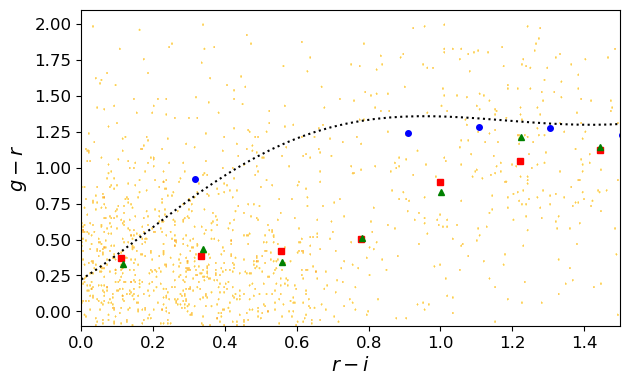

In [71]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
norm_r3 = ImageNormalize(vmin=0.1, vmax=100, stretch=LogStretch())

plt.plot(x_new,y_new,color='k',linestyle=':', label='Polynomial fit')
ax.scatter_density(df_locus_i_r3, df_locus_g_r3, cmap=cmap, norm=norm_r3)

ax.errorbar((mean_sglc_r3[1][1:] + mean_sglc_r3[1][:-1])/2, mean_sglc_r3[0],  fmt='s', mfc='red', ecolor='red', mec='red', ms=4, label='SGLC') # understand yerr=std_ML, 
ax.errorbar((mean_class_r3[1][1:] + mean_class_r3[1][:-1])/2, mean_class_r3[0],  fmt='^', mfc='green', ecolor='green', mec='green', ms=4, label='CLASS_STAR') # understand yerr=std_ML, 
plt.errorbar((mean_xgb_r3[1][1:] + mean_xgb_r3[1][:-1])/2, mean_xgb_r3[0],  fmt='o', mfc='blue', ecolor='blue', mec='blue', ms=4, label='XGB') # understand yerr=std_ML, 

ax.set_aspect(0.4)

plt.xlabel(r'$r-i$', fontsize=14)
plt.ylabel(r'$g-r$', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(0,1.5)
plt.ylim(-0.1,2.1)

plt.tight_layout()
plt.savefig('figs/locus_r3.pdf', bbox_inches='tight')

Figure 9:

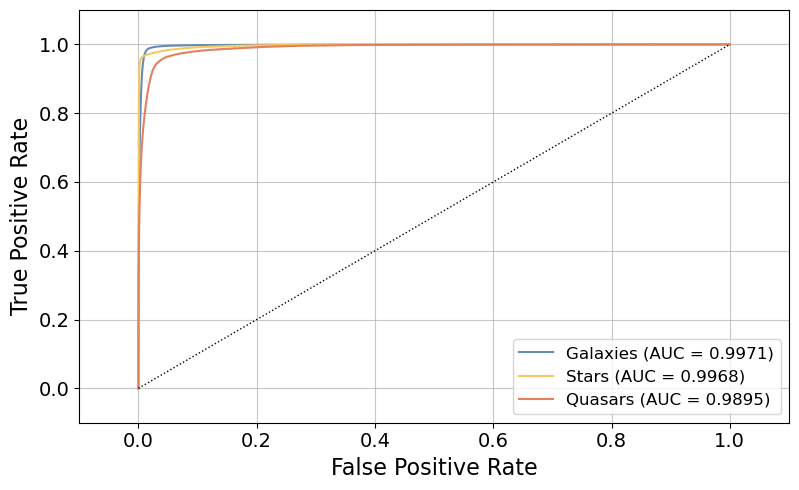

In [73]:
plt.figure(figsize=(5*(1+np.sqrt(5))/2,5))

clf_labels = ['Galaxies','Stars','Quasars']
colors = ['#668ab7','#f6c95d','#e4815d']
linestyles = ['-','-','-']

for y_test_m, values, label, clr, ls \
        in zip([y_test_ohe[:, 0], y_test_ohe[:, 1], y_test_ohe[:, 2]], [xgboost_prob[:, 0], xgboost_prob[:, 1], xgboost_prob[:, 2]], clf_labels, colors, linestyles):
    
    fpr, tpr, thresholds = roc_curve(y_true=y_test_m, y_score=values, pos_label=1)
    roc_auc = auc(x=fpr, y=tpr)
    
    plt.plot(fpr, tpr,color=clr,linestyle=ls,label='%s (AUC = %0.4f)' % (label, roc_auc))
      
plt.legend(loc='best', fontsize=12)
plt.plot([0, 1], [0, 1], linestyle=':', color='black', linewidth=1)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.7)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('figs/roc.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show() 
plt.close()

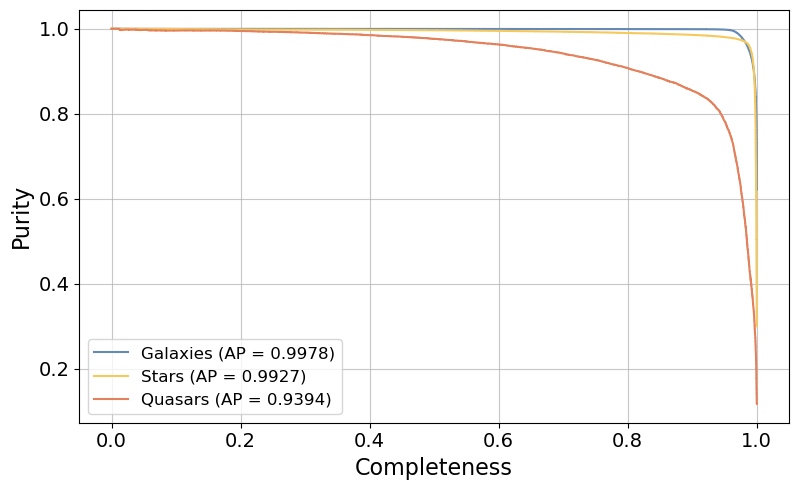

In [75]:
plt.figure(figsize=(5*(1+np.sqrt(5))/2,5))

clf_labels = ['Galaxies','Stars','Quasars']
colors = ['#668ab7','#f6c95d','#e4815d']
linestyles = ['-','-','-']

for y_test_m, values, label, clr, ls \
        in zip([y_test_ohe[:, 1], y_test_ohe[:, 0], y_test_ohe[:, 2]], [xgboost_prob[:, 1], xgboost_prob[:, 0], xgboost_prob[:, 2]], clf_labels, colors, linestyles):

    precision, recall, thresholds = precision_recall_curve(y_test_m, values, pos_label=1)
    #roc_auc = auc(x=recall, y=precision)
    #print(precision)
    #print(recall)
    
    #lc = colorline(recall, precision, thresholds)
    average_precision = average_precision_score(y_test_m, values)
    plt.plot(recall, precision, color=clr,linestyle=ls,label='%s (AP = %0.4f)' % (label, average_precision))
      
#plt.colorbar(lc)           
plt.legend(loc='lower left', fontsize=12)
#plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)

#plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.7)
plt.xlabel('Completeness', fontsize=16)
plt.ylabel('Purity', fontsize=16)
#plt.ylim([0.86, 1.01])
#plt.xlim([0.3, 1.01])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('figs/purcom.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show() 
plt.close()

Figure 10:

In [76]:
xgboost_prob_sdss = xgboost.predict_proba(x_test_sdss.iloc[:,:-1])

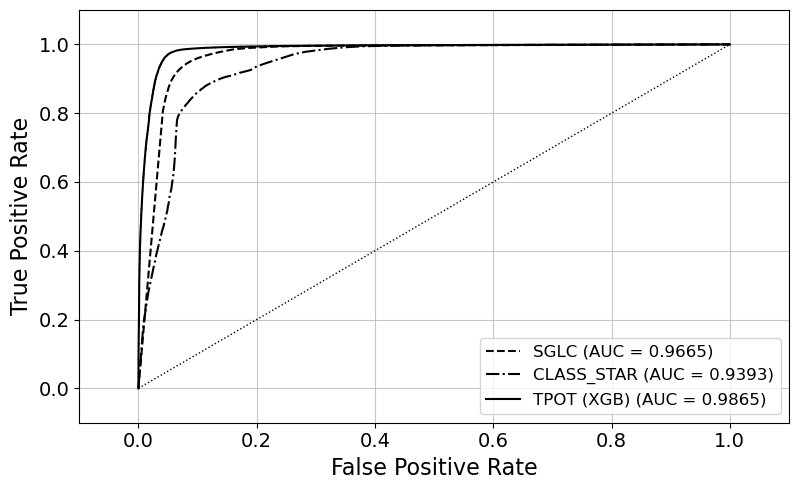

In [77]:
plt.figure(figsize=(5*(1+np.sqrt(5))/2,5))

clf_labels = ['SGLC','CLASS_STAR','TPOT (XGB)']
colors = ['black','black','black']
linestyles = ['--','-.','-']

for y_test_m, values, label, clr, ls \
        in zip([y_test_ohe_sdss[:, 0], y_test_ohe_sdss[:, 0], y_test_ohe_sdss[:, 0]], \
               [1. - y_test_sdss['SGLC'], 1. - y_test_sdss['CLASS_STAR'], xgboost_prob_sdss[:, 0]], \
               clf_labels, colors, linestyles):
    
    fpr, tpr, thresholds = roc_curve(y_true=y_test_m, y_score=values, pos_label=1)
    roc_auc = auc(x=fpr, y=tpr)
    
    plt.plot(fpr, tpr,color=clr,linestyle=ls,label='%s (AUC = %0.4f)' % (label, roc_auc))
      
plt.legend(loc='best', fontsize=12)
plt.plot([0, 1], [0, 1], linestyle=':', color='black', linewidth=1)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.7)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('figs/roc_galaxy.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show() 
plt.close()

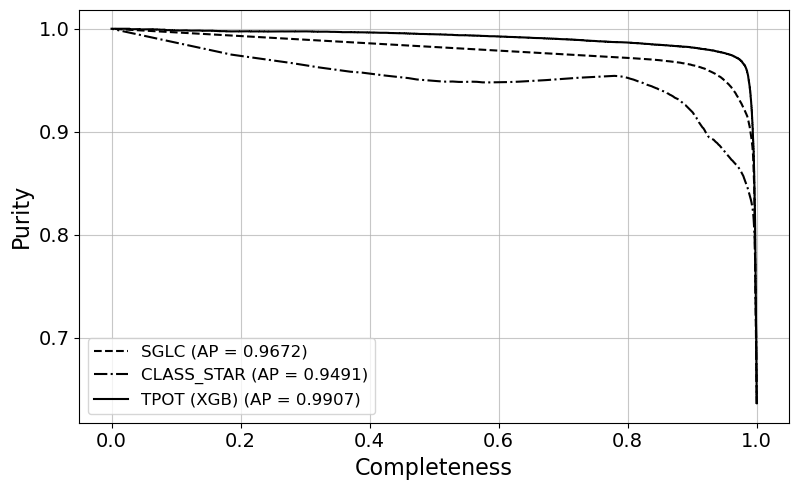

In [78]:
plt.figure(figsize=(5*(1+np.sqrt(5))/2,5))

clf_labels = ['SGLC','CLASS_STAR', 'TPOT (XGB)']
colors = ['black','black','black']
linestyles = ['--', '-.','-']

for y_test_m, values, label, clr, ls \
        in zip([y_test_ohe_sdss[:, 0], y_test_ohe_sdss[:, 0], y_test_ohe_sdss[:, 0]], \
               [1. - y_test_sdss['SGLC'], 1. - y_test_sdss['CLASS_STAR'], xgboost_prob_sdss[:, 0]],\
               clf_labels, colors, linestyles):

    precision, recall, thresholds = precision_recall_curve(y_test_m, values, pos_label=1)
    #roc_auc = auc(x=recall, y=precision)
    #print(precision)
    #print(recall)
    
    #lc = colorline(recall, precision, thresholds)
    average_precision = average_precision_score(y_test_m, values)
    plt.plot(recall, precision, color=clr,linestyle=ls,label='%s (AP = %0.4f)' % (label, average_precision))
      
#plt.colorbar(lc)           
plt.legend(loc='lower left', fontsize=12)
#plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)


#plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.7)
plt.xlabel('Completeness', fontsize=16)
plt.ylabel('Purity', fontsize=16)
#plt.ylim([0.86, 1.01])
plt.yticks([0.7,0.8,0.9,1])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('figs/purcom_galaxy.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show() 
plt.close()

Figure 11:

In [79]:
feature_importance_galaxy = permutation_importance(xgboost.estimators_[0], x_test.iloc[:,:-1], y_test_ohe[:, 0], n_repeats=10, random_state=42, n_jobs=-1, scoring='average_precision')

In [80]:
feature_importance_star = permutation_importance(xgboost.estimators_[1], x_test.iloc[:,:-1], y_test_ohe[:, 1], n_repeats=10, random_state=42, n_jobs=-1, scoring='average_precision')

In [81]:
feature_importance_qso = permutation_importance(xgboost.estimators_[2], x_test.iloc[:,:-1], y_test_ohe[:,2], n_repeats=10, random_state=42, n_jobs=-1, scoring='average_precision')

In [82]:
extinction_galaxy = feature_importance_galaxy.importances_mean[0:2].sum()/feature_importance_galaxy.importances_mean.sum()
extinction_galaxy_error = feature_importance_galaxy.importances_std[0:2].sum()/feature_importance_galaxy.importances_mean.sum()

r_galaxy = (feature_importance_galaxy.importances_mean[2]+feature_importance_galaxy.importances_mean[20])/feature_importance_galaxy.importances_mean.sum()
r_galaxy_error = (feature_importance_galaxy.importances_std[2]+feature_importance_galaxy.importances_std[20])/feature_importance_galaxy.importances_mean.sum()
g_galaxy = (feature_importance_galaxy.importances_mean[3]+feature_importance_galaxy.importances_mean[21])/feature_importance_galaxy.importances_mean.sum()
g_galaxy_error = (feature_importance_galaxy.importances_std[3]+feature_importance_galaxy.importances_std[21])/feature_importance_galaxy.importances_mean.sum()
i_galaxy = (feature_importance_galaxy.importances_mean[4]+feature_importance_galaxy.importances_mean[22])/feature_importance_galaxy.importances_mean.sum()
i_galaxy_error = (feature_importance_galaxy.importances_std[4]+feature_importance_galaxy.importances_std[22])/feature_importance_galaxy.importances_mean.sum()
z_galaxy = (feature_importance_galaxy.importances_mean[5]+feature_importance_galaxy.importances_mean[23])/feature_importance_galaxy.importances_mean.sum()
z_galaxy_error = (feature_importance_galaxy.importances_std[5]+feature_importance_galaxy.importances_std[23])/feature_importance_galaxy.importances_mean.sum()
u_galaxy = (feature_importance_galaxy.importances_mean[6]+feature_importance_galaxy.importances_mean[24])/feature_importance_galaxy.importances_mean.sum()
u_galaxy_error = (feature_importance_galaxy.importances_std[6]+feature_importance_galaxy.importances_std[24])/feature_importance_galaxy.importances_mean.sum()

J0378_galaxy = (feature_importance_galaxy.importances_mean[7]+feature_importance_galaxy.importances_mean[25])/feature_importance_galaxy.importances_mean.sum()
J0378_galaxy_error = (feature_importance_galaxy.importances_std[7]+feature_importance_galaxy.importances_std[25])/feature_importance_galaxy.importances_mean.sum()
J0395_galaxy = (feature_importance_galaxy.importances_mean[8]+feature_importance_galaxy.importances_mean[26])/feature_importance_galaxy.importances_mean.sum()
J0395_galaxy_error = (feature_importance_galaxy.importances_std[8]+feature_importance_galaxy.importances_std[26])/feature_importance_galaxy.importances_mean.sum()
J0410_galaxy = (feature_importance_galaxy.importances_mean[9]+feature_importance_galaxy.importances_mean[27])/feature_importance_galaxy.importances_mean.sum()
J0410_galaxy_error = (feature_importance_galaxy.importances_std[9]+feature_importance_galaxy.importances_std[27])/feature_importance_galaxy.importances_mean.sum()
J0430_galaxy = (feature_importance_galaxy.importances_mean[10]+feature_importance_galaxy.importances_mean[28])/feature_importance_galaxy.importances_mean.sum()
J0430_galaxy_error = (feature_importance_galaxy.importances_std[10]+feature_importance_galaxy.importances_std[28])/feature_importance_galaxy.importances_mean.sum()
J0515_galaxy = (feature_importance_galaxy.importances_mean[11]+feature_importance_galaxy.importances_mean[29])/feature_importance_galaxy.importances_mean.sum()
J0515_galaxy_error = (feature_importance_galaxy.importances_std[11]+feature_importance_galaxy.importances_std[29])/feature_importance_galaxy.importances_mean.sum()
J0660_galaxy = (feature_importance_galaxy.importances_mean[12]+feature_importance_galaxy.importances_mean[30])/feature_importance_galaxy.importances_mean.sum()
J0660_galaxy_error = (feature_importance_galaxy.importances_std[12]+feature_importance_galaxy.importances_std[30])/feature_importance_galaxy.importances_mean.sum()
J0861_galaxy = (feature_importance_galaxy.importances_mean[13]+feature_importance_galaxy.importances_mean[31])/feature_importance_galaxy.importances_mean.sum()
J0861_galaxy_error = (feature_importance_galaxy.importances_std[13]+feature_importance_galaxy.importances_std[31])/feature_importance_galaxy.importances_mean.sum()

uJAVA_J0395_galaxy = feature_importance_galaxy.importances_mean[14]/feature_importance_galaxy.importances_mean.sum()
uJAVA_J0395_galaxy_error = feature_importance_galaxy.importances_std[14]/feature_importance_galaxy.importances_mean.sum()
uJAVA_J0410_galaxy = feature_importance_galaxy.importances_mean[15]/feature_importance_galaxy.importances_mean.sum()
uJAVA_J0410_galaxy_error = feature_importance_galaxy.importances_std[15]/feature_importance_galaxy.importances_mean.sum()
u_g_galaxy = feature_importance_galaxy.importances_mean[16]/feature_importance_galaxy.importances_mean.sum()
u_g_galaxy_error = feature_importance_galaxy.importances_std[16]/feature_importance_galaxy.importances_mean.sum()
g_r_galaxy = feature_importance_galaxy.importances_mean[17]/feature_importance_galaxy.importances_mean.sum()
g_r_galaxy_error = feature_importance_galaxy.importances_std[17]/feature_importance_galaxy.importances_mean.sum()
r_i_galaxy = feature_importance_galaxy.importances_mean[18]/feature_importance_galaxy.importances_mean.sum()
r_i_galaxy_error = feature_importance_galaxy.importances_std[18]/feature_importance_galaxy.importances_mean.sum()
i_z_galaxy = feature_importance_galaxy.importances_mean[19]/feature_importance_galaxy.importances_mean.sum()
i_z_galaxy_error = feature_importance_galaxy.importances_std[19]/feature_importance_galaxy.importances_mean.sum()

c_r_galaxy = feature_importance_galaxy.importances_mean[32]/feature_importance_galaxy.importances_mean.sum()
c_r_galaxy_error = feature_importance_galaxy.importances_std[32]/feature_importance_galaxy.importances_mean.sum()

mu_max_mag_apertu_galaxy = feature_importance_galaxy.importances_mean[33]/feature_importance_galaxy.importances_mean.sum()
mu_max_mag_apertu_galaxy_error = feature_importance_galaxy.importances_std[33]/feature_importance_galaxy.importances_mean.sum()

fwhm_galaxy = feature_importance_galaxy.importances_mean[34]/feature_importance_galaxy.importances_mean.sum()
fwhm_galaxy_error = feature_importance_galaxy.importances_std[34]/feature_importance_galaxy.importances_mean.sum()

alb_galaxy = feature_importance_galaxy.importances_mean[35]/feature_importance_galaxy.importances_mean.sum()
alb_galaxy_error = feature_importance_galaxy.importances_std[35]/feature_importance_galaxy.importances_mean.sum()

psf_galaxy = feature_importance_galaxy.importances_mean[36]/feature_importance_galaxy.importances_mean.sum()
psf_galaxy_error = feature_importance_galaxy.importances_std[36]/feature_importance_galaxy.importances_mean.sum()

In [83]:
extinction_star = feature_importance_star.importances_mean[0:2].sum()/feature_importance_star.importances_mean.sum()
extinction_star_error = feature_importance_star.importances_std[0:2].sum()/feature_importance_star.importances_mean.sum()

r_star = (feature_importance_star.importances_mean[2]+feature_importance_star.importances_mean[20])/feature_importance_star.importances_mean.sum()
r_star_error = (feature_importance_star.importances_std[2]+feature_importance_star.importances_std[20])/feature_importance_star.importances_mean.sum()
g_star = (feature_importance_star.importances_mean[3]+feature_importance_star.importances_mean[21])/feature_importance_star.importances_mean.sum()
g_star_error = (feature_importance_star.importances_std[3]+feature_importance_star.importances_std[21])/feature_importance_star.importances_mean.sum()
i_star = (feature_importance_star.importances_mean[4]+feature_importance_star.importances_mean[22])/feature_importance_star.importances_mean.sum()
i_star_error = (feature_importance_star.importances_std[4]+feature_importance_star.importances_std[22])/feature_importance_star.importances_mean.sum()
z_star = (feature_importance_star.importances_mean[5]+feature_importance_star.importances_mean[23])/feature_importance_star.importances_mean.sum()
z_star_error = (feature_importance_star.importances_std[5]+feature_importance_star.importances_std[23])/feature_importance_star.importances_mean.sum()
u_star = (feature_importance_star.importances_mean[6]+feature_importance_star.importances_mean[24])/feature_importance_star.importances_mean.sum()
u_star_error = (feature_importance_star.importances_std[6]+feature_importance_star.importances_std[24])/feature_importance_star.importances_mean.sum()

J0378_star = (feature_importance_star.importances_mean[7]+feature_importance_star.importances_mean[25])/feature_importance_star.importances_mean.sum()
J0378_star_error = (feature_importance_star.importances_std[7]+feature_importance_star.importances_std[25])/feature_importance_star.importances_mean.sum()
J0395_star = (feature_importance_star.importances_mean[8]+feature_importance_star.importances_mean[26])/feature_importance_star.importances_mean.sum()
J0395_star_error = (feature_importance_star.importances_std[8]+feature_importance_star.importances_std[26])/feature_importance_star.importances_mean.sum()
J0410_star = (feature_importance_star.importances_mean[9]+feature_importance_star.importances_mean[27])/feature_importance_star.importances_mean.sum()
J0410_star_error = (feature_importance_star.importances_std[9]+feature_importance_star.importances_std[27])/feature_importance_star.importances_mean.sum()
J0430_star = (feature_importance_star.importances_mean[10]+feature_importance_star.importances_mean[28])/feature_importance_star.importances_mean.sum()
J0430_star_error = (feature_importance_star.importances_std[10]+feature_importance_star.importances_std[28])/feature_importance_star.importances_mean.sum()
J0515_star = (feature_importance_star.importances_mean[11]+feature_importance_star.importances_mean[29])/feature_importance_star.importances_mean.sum()
J0515_star_error = (feature_importance_star.importances_std[11]+feature_importance_star.importances_std[29])/feature_importance_star.importances_mean.sum()
J0660_star = (feature_importance_star.importances_mean[12]+feature_importance_star.importances_mean[30])/feature_importance_star.importances_mean.sum()
J0660_star_error = (feature_importance_star.importances_std[12]+feature_importance_star.importances_std[30])/feature_importance_star.importances_mean.sum()
J0861_star = (feature_importance_star.importances_mean[13]+feature_importance_star.importances_mean[31])/feature_importance_star.importances_mean.sum()
J0861_star_error = (feature_importance_star.importances_std[13]+feature_importance_star.importances_std[31])/feature_importance_star.importances_mean.sum()

uJAVA_J0395_star = feature_importance_star.importances_mean[14]/feature_importance_star.importances_mean.sum()
uJAVA_J0395_star_error = feature_importance_star.importances_std[14]/feature_importance_star.importances_mean.sum()
uJAVA_J0410_star = feature_importance_star.importances_mean[15]/feature_importance_star.importances_mean.sum()
uJAVA_J0410_star_error = feature_importance_star.importances_std[15]/feature_importance_star.importances_mean.sum()
u_g_star = feature_importance_star.importances_mean[16]/feature_importance_star.importances_mean.sum()
u_g_star_error = feature_importance_star.importances_std[16]/feature_importance_star.importances_mean.sum()
g_r_star = feature_importance_star.importances_mean[17]/feature_importance_star.importances_mean.sum()
g_r_star_error = feature_importance_star.importances_std[17]/feature_importance_star.importances_mean.sum()
r_i_star = feature_importance_star.importances_mean[18]/feature_importance_star.importances_mean.sum()
r_i_star_error = feature_importance_star.importances_std[18]/feature_importance_star.importances_mean.sum()
i_z_star = feature_importance_star.importances_mean[19]/feature_importance_star.importances_mean.sum()
i_z_star_error = feature_importance_star.importances_std[19]/feature_importance_star.importances_mean.sum()

c_r_star = feature_importance_star.importances_mean[32]/feature_importance_star.importances_mean.sum()
c_r_star_error = feature_importance_star.importances_std[32]/feature_importance_star.importances_mean.sum()

mu_max_mag_apertu_star = feature_importance_star.importances_mean[33]/feature_importance_star.importances_mean.sum()
mu_max_mag_apertu_star_error = feature_importance_star.importances_std[33]/feature_importance_star.importances_mean.sum()

fwhm_star = feature_importance_star.importances_mean[34]/feature_importance_star.importances_mean.sum()
fwhm_star_error = feature_importance_star.importances_std[34]/feature_importance_star.importances_mean.sum()

alb_star = feature_importance_star.importances_mean[35]/feature_importance_star.importances_mean.sum()
alb_star_error = feature_importance_star.importances_std[35]/feature_importance_star.importances_mean.sum()

psf_star = feature_importance_star.importances_mean[36]/feature_importance_star.importances_mean.sum()
psf_star_error = feature_importance_star.importances_std[36]/feature_importance_star.importances_mean.sum()

In [84]:
extinction_qso = feature_importance_qso.importances_mean[0:2].sum()/feature_importance_qso.importances_mean.sum()
extinction_qso_error = feature_importance_qso.importances_std[0:2].sum()/feature_importance_qso.importances_mean.sum()

r_qso = (feature_importance_qso.importances_mean[2]+feature_importance_qso.importances_mean[20])/feature_importance_qso.importances_mean.sum()
r_qso_error = (feature_importance_qso.importances_std[2]+feature_importance_qso.importances_std[20])/feature_importance_qso.importances_mean.sum()
g_qso = (feature_importance_qso.importances_mean[3]+feature_importance_qso.importances_mean[21])/feature_importance_qso.importances_mean.sum()
g_qso_error = (feature_importance_qso.importances_std[3]+feature_importance_qso.importances_std[21])/feature_importance_qso.importances_mean.sum()
i_qso = (feature_importance_qso.importances_mean[4]+feature_importance_qso.importances_mean[22])/feature_importance_qso.importances_mean.sum()
i_qso_error = (feature_importance_qso.importances_std[4]+feature_importance_qso.importances_std[22])/feature_importance_qso.importances_mean.sum()
z_qso = (feature_importance_qso.importances_mean[5]+feature_importance_qso.importances_mean[23])/feature_importance_qso.importances_mean.sum()
z_qso_error = (feature_importance_qso.importances_std[5]+feature_importance_qso.importances_std[23])/feature_importance_qso.importances_mean.sum()
u_qso = (feature_importance_qso.importances_mean[6]+feature_importance_qso.importances_mean[24])/feature_importance_qso.importances_mean.sum()
u_qso_error = (feature_importance_qso.importances_std[6]+feature_importance_qso.importances_std[24])/feature_importance_qso.importances_mean.sum()

J0378_qso = (feature_importance_qso.importances_mean[7]+feature_importance_qso.importances_mean[25])/feature_importance_qso.importances_mean.sum()
J0378_qso_error = (feature_importance_qso.importances_std[7]+feature_importance_qso.importances_std[25])/feature_importance_qso.importances_mean.sum()
J0395_qso = (feature_importance_qso.importances_mean[8]+feature_importance_qso.importances_mean[26])/feature_importance_qso.importances_mean.sum()
J0395_qso_error = (feature_importance_qso.importances_std[8]+feature_importance_qso.importances_std[26])/feature_importance_qso.importances_mean.sum()
J0410_qso = (feature_importance_qso.importances_mean[9]+feature_importance_qso.importances_mean[27])/feature_importance_qso.importances_mean.sum()
J0410_qso_error = (feature_importance_qso.importances_std[9]+feature_importance_qso.importances_std[27])/feature_importance_qso.importances_mean.sum()
J0430_qso = (feature_importance_qso.importances_mean[10]+feature_importance_qso.importances_mean[28])/feature_importance_qso.importances_mean.sum()
J0430_qso_error = (feature_importance_qso.importances_std[10]+feature_importance_qso.importances_std[28])/feature_importance_qso.importances_mean.sum()
J0515_qso = (feature_importance_qso.importances_mean[11]+feature_importance_qso.importances_mean[29])/feature_importance_qso.importances_mean.sum()
J0515_qso_error = (feature_importance_qso.importances_std[11]+feature_importance_qso.importances_std[29])/feature_importance_qso.importances_mean.sum()
J0660_qso = (feature_importance_qso.importances_mean[12]+feature_importance_qso.importances_mean[30])/feature_importance_qso.importances_mean.sum()
J0660_qso_error = (feature_importance_qso.importances_std[12]+feature_importance_qso.importances_std[30])/feature_importance_qso.importances_mean.sum()
J0861_qso = (feature_importance_qso.importances_mean[13]+feature_importance_qso.importances_mean[31])/feature_importance_qso.importances_mean.sum()
J0861_qso_error = (feature_importance_qso.importances_std[13]+feature_importance_qso.importances_std[31])/feature_importance_qso.importances_mean.sum()

uJAVA_J0395_qso = feature_importance_qso.importances_mean[14]/feature_importance_qso.importances_mean.sum()
uJAVA_J0395_qso_error = feature_importance_qso.importances_std[14]/feature_importance_qso.importances_mean.sum()
uJAVA_J0410_qso = feature_importance_qso.importances_mean[15]/feature_importance_qso.importances_mean.sum()
uJAVA_J0410_qso_error = feature_importance_qso.importances_std[15]/feature_importance_qso.importances_mean.sum()
u_g_qso = feature_importance_qso.importances_mean[16]/feature_importance_qso.importances_mean.sum()
u_g_qso_error = feature_importance_qso.importances_std[16]/feature_importance_qso.importances_mean.sum()
g_r_qso = feature_importance_qso.importances_mean[17]/feature_importance_qso.importances_mean.sum()
g_r_qso_error = feature_importance_qso.importances_std[17]/feature_importance_qso.importances_mean.sum()
r_i_qso = feature_importance_qso.importances_mean[18]/feature_importance_qso.importances_mean.sum()
r_i_qso_error = feature_importance_qso.importances_std[18]/feature_importance_qso.importances_mean.sum()
i_z_qso = feature_importance_qso.importances_mean[19]/feature_importance_qso.importances_mean.sum()
i_z_qso_error = feature_importance_qso.importances_std[19]/feature_importance_qso.importances_mean.sum()

c_r_qso = feature_importance_qso.importances_mean[32]/feature_importance_qso.importances_mean.sum()
c_r_qso_error = feature_importance_qso.importances_std[32]/feature_importance_qso.importances_mean.sum()

mu_max_mag_apertu_qso = feature_importance_qso.importances_mean[33]/feature_importance_qso.importances_mean.sum()
mu_max_mag_apertu_qso_error = feature_importance_qso.importances_std[33]/feature_importance_qso.importances_mean.sum()

fwhm_qso = feature_importance_qso.importances_mean[34]/feature_importance_qso.importances_mean.sum()
fwhm_qso_error = feature_importance_qso.importances_std[34]/feature_importance_qso.importances_mean.sum()

alb_qso = feature_importance_qso.importances_mean[35]/feature_importance_qso.importances_mean.sum()
alb_qso_error = feature_importance_qso.importances_std[35]/feature_importance_qso.importances_mean.sum()

psf_qso = feature_importance_qso.importances_mean[36]/feature_importance_qso.importances_mean.sum()
psf_qso_error = feature_importance_qso.importances_std[36]/feature_importance_qso.importances_mean.sum()

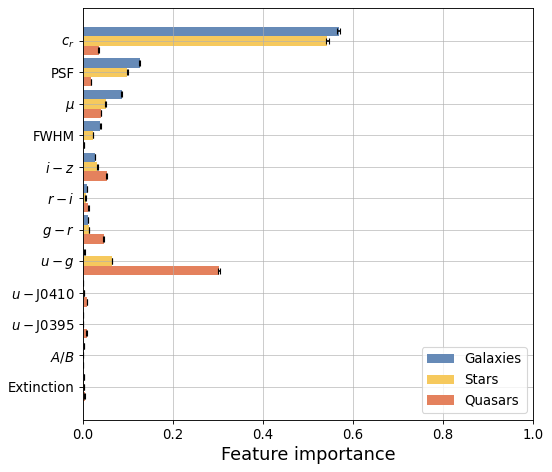

In [85]:
figure(figsize=(7, 6), dpi=80)

rows = [r'Extinction',r'$A/B$',r'$u-$J0395',r'$u-$J0410',r'$u-g$',r'$g-r$',r'$r-i$',r'$i-z$',r'FWHM',r'$\mu$',r'PSF',r'$c_r$']
rows_axis = np.arange(len(rows))

galaxy = [extinction_galaxy,alb_galaxy,uJAVA_J0395_galaxy,uJAVA_J0410_galaxy,u_g_galaxy,g_r_galaxy,i_z_galaxy,r_i_galaxy,fwhm_galaxy,mu_max_mag_apertu_galaxy,psf_galaxy,c_r_galaxy]
galaxy_error = [extinction_galaxy_error,alb_galaxy_error,uJAVA_J0395_galaxy_error,uJAVA_J0410_galaxy_error,u_g_galaxy_error,g_r_galaxy_error,r_i_galaxy_error,i_z_galaxy_error,fwhm_galaxy_error,mu_max_mag_apertu_galaxy_error,psf_galaxy_error,c_r_galaxy_error]

star = [extinction_star,alb_star,uJAVA_J0395_star,uJAVA_J0410_star,u_g_star,g_r_star,i_z_star,r_i_star,fwhm_star,mu_max_mag_apertu_star,psf_star,c_r_star]
star_error = [extinction_star_error,alb_star_error,uJAVA_J0395_star_error,uJAVA_J0410_star_error,u_g_star_error,g_r_star_error,r_i_star_error,i_z_star_error,fwhm_star_error,mu_max_mag_apertu_star_error,psf_star_error,c_r_star_error]

qso = [extinction_qso,alb_qso,uJAVA_J0395_qso,uJAVA_J0410_qso,u_g_qso,g_r_qso,i_z_qso,r_i_qso,fwhm_qso,mu_max_mag_apertu_qso,psf_qso,c_r_qso]
qso_error = [extinction_qso_error,alb_qso_error,uJAVA_J0395_qso_error,uJAVA_J0410_qso_error,u_g_qso_error,g_r_qso_error,r_i_qso_error,i_z_qso_error,fwhm_qso_error,mu_max_mag_apertu_qso_error,psf_qso_error,c_r_qso_error]

plt.yticks(rows_axis,rows, fontsize=12)
plt.xlim(0,1)
plt.xticks(fontsize=12)
plt.xlabel(r'Feature importance',fontsize=16)
plt.barh(rows_axis+0.3,galaxy,0.3,color=['#668ab7'], xerr=galaxy_error, capsize=3, label=r'Galaxies')
plt.barh(rows_axis,star, 0.3, color=['#f6c95d'], xerr=star_error, capsize=3, label=r'Stars')
plt.barh(rows_axis-0.3,qso,0.3,color=['#e4815d'], xerr=qso_error, capsize=3, label=r'Quasars')

plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.7)

plt.savefig('figs/feat_imp.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show() 
plt.close()

Figure 12:

In [86]:
u, Tu = np.loadtxt('/Users/rodrigovonmarttens/Documents/GitHub/J-PLUS-classification/filters/JPLUS_uJava_FullEfficiency.tab',unpack=True)
J0378, TJ0378 = np.loadtxt('/Users/rodrigovonmarttens/Documents/GitHub/J-PLUS-classification/filters/JPLUS_J0378_FullEfficiency.tab',unpack=True)
J0395, TJ0395 = np.loadtxt('/Users/rodrigovonmarttens/Documents/GitHub/J-PLUS-classification/filters/JPLUS_J0395_FullEfficiency.tab',unpack=True)
J0410, TJ0410 = np.loadtxt('/Users/rodrigovonmarttens/Documents/GitHub/J-PLUS-classification/filters/JPLUS_J0410_FullEfficiency.tab',unpack=True)
J0430, TJ0430 = np.loadtxt('/Users/rodrigovonmarttens/Documents/GitHub/J-PLUS-classification/filters/JPLUS_J0430_FullEfficiency.tab',unpack=True)
g, Tg = np.loadtxt('/Users/rodrigovonmarttens/Documents/GitHub/J-PLUS-classification/filters/JPLUS_gSDSS_FullEfficiency.tab',unpack=True)
J0515, TJ0515 = np.loadtxt('/Users/rodrigovonmarttens/Documents/GitHub/J-PLUS-classification/filters/JPLUS_J0515_FullEfficiency.tab',unpack=True)
r, Tr = np.loadtxt('/Users/rodrigovonmarttens/Documents/GitHub/J-PLUS-classification/filters/JPLUS_rSDSS_FullEfficiency.tab',unpack=True)
J0660, TJ0660 = np.loadtxt('/Users/rodrigovonmarttens/Documents/GitHub/J-PLUS-classification/filters/JPLUS_J0660_FullEfficiency.tab',unpack=True)
i, Ti = np.loadtxt('/Users/rodrigovonmarttens/Documents/GitHub/J-PLUS-classification/filters/JPLUS_iSDSS_FullEfficiency.tab',unpack=True)
J0861, TJ0861 = np.loadtxt('/Users/rodrigovonmarttens/Documents/GitHub/J-PLUS-classification/filters/JPLUS_J0861_FullEfficiency.tab',unpack=True)
z, Tz = np.loadtxt('/Users/rodrigovonmarttens/Documents/GitHub/J-PLUS-classification/filters/JPLUS_zSDSS_FullEfficiency.tab',unpack=True)

In [87]:
def wavelength_to_rgb(wavelength, gamma=0.8):
    ''' taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 750:
        A = 1.
    else:
        A=0.5
    if wavelength < 380:
        wavelength = 380.
    if wavelength >750:
        wavelength = 750.
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R,G,B)

def wavelength_rescale(wavelength):
    return(0.65731 * wavelength + 150.927)

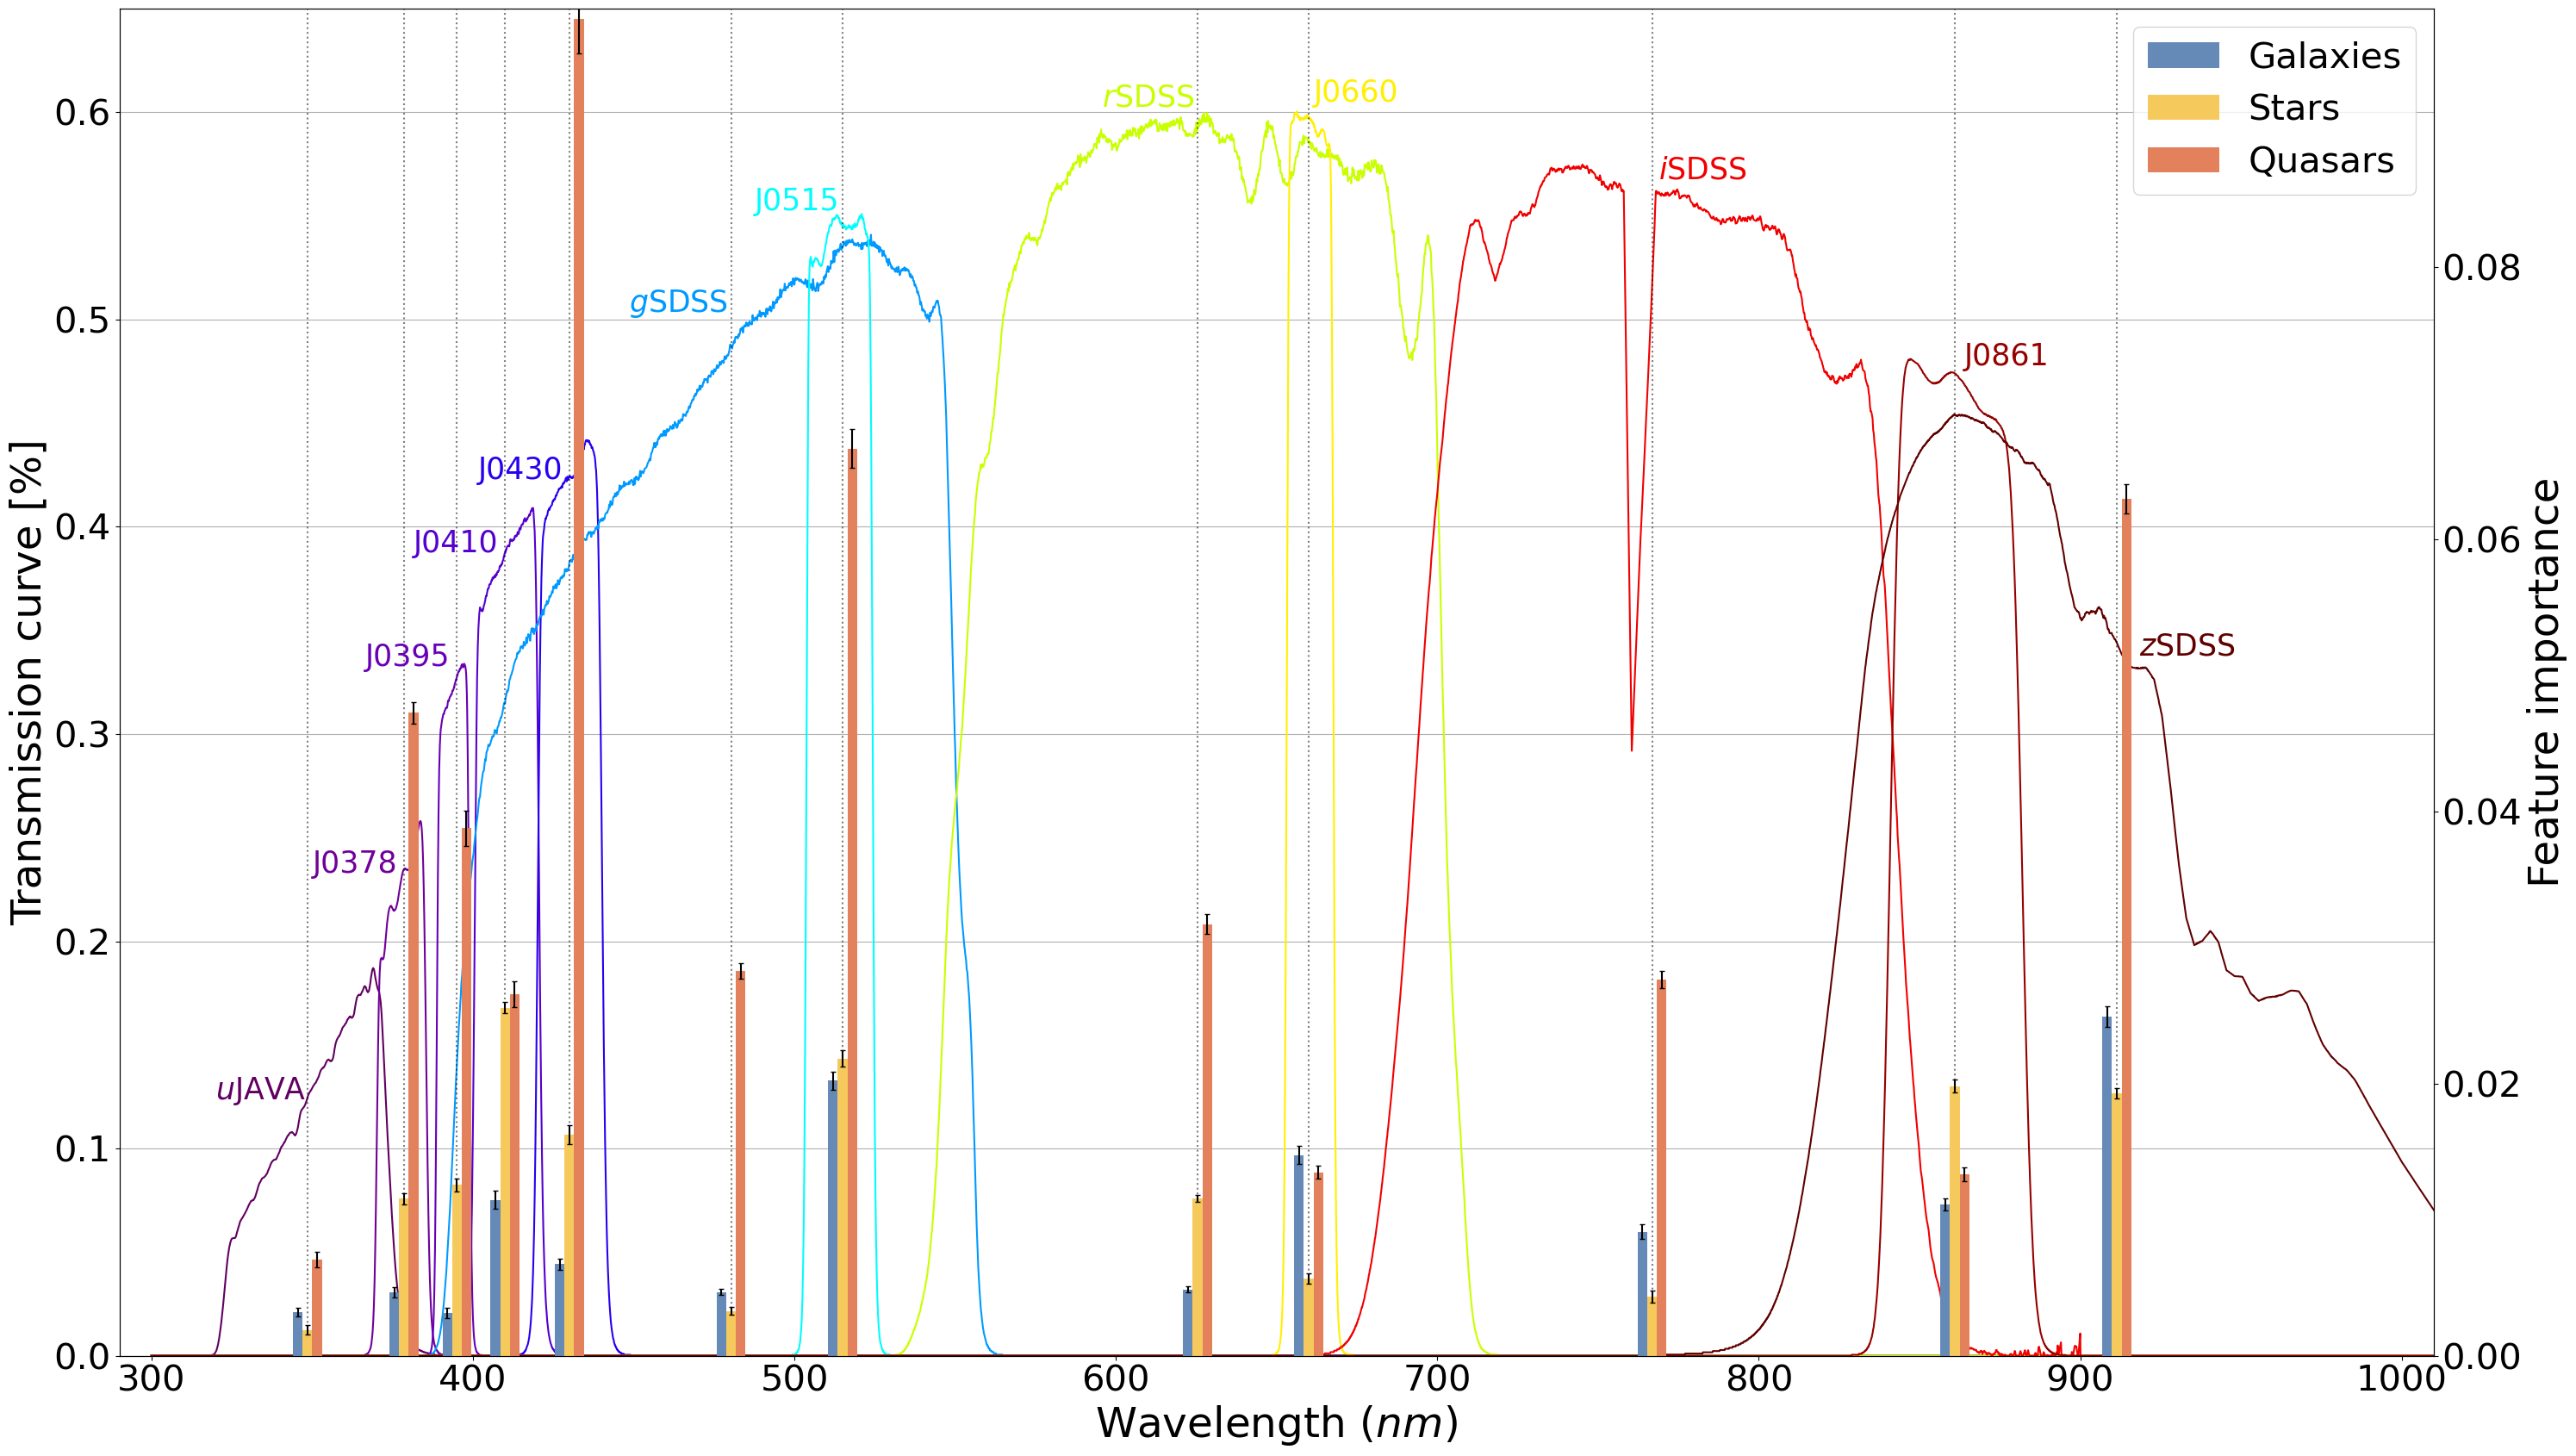

In [88]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
fig.set_size_inches(30,17)

wavelength = np.array([348.5,378.5,395.0,410.0,430.0,480.3,515.0,625.4,660.0,766.8,861.0,911.4])
rows_wavelength = np.arange(300,1100,100)

galaxy_wavelength = [u_galaxy,J0378_galaxy,J0395_galaxy,J0410_galaxy,J0430_galaxy,g_galaxy,J0515_galaxy,r_galaxy,J0660_galaxy,i_galaxy,J0861_galaxy,z_galaxy]
galaxy_wavelength_error = [u_galaxy_error,J0378_galaxy_error,J0395_galaxy_error,J0410_galaxy_error,J0430_galaxy_error,g_galaxy_error,J0515_galaxy_error,r_galaxy_error,J0660_galaxy_error,i_galaxy_error,J0861_galaxy_error,z_galaxy_error]

star_wavelength = [u_star,J0378_star,J0395_star,J0410_star,J0430_star,g_star,J0515_star,r_star,J0660_star,i_star,J0861_star,z_star]
star_wavelength_error = [u_star_error,J0378_star_error,J0395_star_error,J0410_star_error,J0430_star_error,g_star_error,J0515_star_error,r_star_error,J0660_star_error,i_star_error,J0861_star_error,z_star_error]

qso_wavelength = [u_qso,J0378_qso,J0395_qso,J0410_qso,J0430_qso,g_qso,J0515_qso,r_qso,J0660_qso,i_qso,J0861_qso,z_qso]
qso_wavelength_error = [u_qso_error,J0378_qso_error,J0395_qso_error,J0410_qso_error,J0430_qso_error,g_qso_error,J0515_qso_error,r_qso_error,J0660_qso_error,i_qso_error,J0861_qso_error,z_qso_error]

ax1.set_ylim(0,0.65)
ax1.set_xlim(290,1010)
ax1.set_xlabel(r'Wavelength ($nm$)',fontsize=35)
ax1.set_ylabel(r'Transmission curve [%]',fontsize=35)
ax1.tick_params(axis='both', which='major', labelsize=30)
ax1.tick_params(axis='both', which='minor', labelsize=30)
ax1.grid(axis='y')
ax1.plot(u/10,Tu,color=wavelength_to_rgb(wavelength_rescale(348.5)))
ax1.plot(J0378/10,TJ0378,color=wavelength_to_rgb(wavelength_rescale(378.5)))
ax1.plot(J0395/10,TJ0395,color=wavelength_to_rgb(wavelength_rescale(395.0)))
ax1.plot(J0410/10,TJ0410,color=wavelength_to_rgb(wavelength_rescale(410.0)))
ax1.plot(J0430/10,TJ0430,color=wavelength_to_rgb(wavelength_rescale(430.0)))
ax1.plot(g/10,Tg,color=wavelength_to_rgb(wavelength_rescale(480.3)))
ax1.plot(J0515/10,TJ0515,color=wavelength_to_rgb(wavelength_rescale(515.0)))
ax1.plot(r/10,Tr,color=wavelength_to_rgb(wavelength_rescale(625.4)))
ax1.plot(J0660/10,TJ0660,color=wavelength_to_rgb(wavelength_rescale(660.0)))
ax1.plot(i/10,Ti,color=wavelength_to_rgb(wavelength_rescale(766.8)))
ax1.plot(J0861/10,TJ0861,color=wavelength_to_rgb(wavelength_rescale(861.0)))
ax1.plot(z/10,Tz,color=wavelength_to_rgb(wavelength_rescale(911.4)))

ax1.text(348,0.12,r'$u$JAVA',ha='right', va='bottom',color=wavelength_to_rgb(wavelength_rescale(348.5)),fontsize=25)
ax1.text(376.5,0.23,r'J0378',ha='right', va='bottom',color=wavelength_to_rgb(wavelength_rescale(378.5)),fontsize=25)
ax1.text(393.0,0.33,r'J0395',ha='right', va='bottom',color=wavelength_to_rgb(wavelength_rescale(395.0)),fontsize=25)
ax1.text(408.0,0.385,r'J0410',ha='right', va='bottom',color=wavelength_to_rgb(wavelength_rescale(410.0)),fontsize=25)
ax1.text(428.0,0.42,r'J0430',ha='right', va='bottom',color=wavelength_to_rgb(wavelength_rescale(430.0)),fontsize=25)
ax1.text(479.3,0.5,r'$g$SDSS',ha='right', va='bottom',color=wavelength_to_rgb(wavelength_rescale(480.3)),fontsize=25)
ax1.text(514.0,0.55,r'J0515',ha='right', va='bottom',color=wavelength_to_rgb(wavelength_rescale(515.0)),fontsize=25)
ax1.text(624.4,0.6,r'$r$SDSS',ha='right', va='bottom',color=wavelength_to_rgb(wavelength_rescale(625.4)),fontsize=25)
ax1.text(661.5,0.602,r'J0660',ha='left', va='bottom',color=wavelength_to_rgb(wavelength_rescale(660.0)),fontsize=25)
ax1.text(768.8,0.565,r'$i$SDSS',ha='left', va='bottom',color=wavelength_to_rgb(wavelength_rescale(766.8)),fontsize=25)
ax1.text(864.0,0.475,r'J0861',ha='left', va='bottom',color=wavelength_to_rgb(wavelength_rescale(861.0)),fontsize=25)
ax1.text(918.4,0.335,r'$z$SDSS',ha='left', va='bottom',color=wavelength_to_rgb(wavelength_rescale(911.4)),fontsize=25)

ax1.axvline(348.5,linestyle=':',color='black',alpha=0.5)
ax1.axvline(378.5,linestyle=':',color='black',alpha=0.5)
ax1.axvline(395.0,linestyle=':',color='black',alpha=0.5)
ax1.axvline(410.0,linestyle=':',color='black',alpha=0.5)
ax1.axvline(430.0,linestyle=':',color='black',alpha=0.5)
ax1.axvline(480.3,linestyle=':',color='black',alpha=0.5)
ax1.axvline(515.0,linestyle=':',color='black',alpha=0.5)
ax1.axvline(625.4,linestyle=':',color='black',alpha=0.5)
ax1.axvline(660.0,linestyle=':',color='black',alpha=0.5)
ax1.axvline(766.8,linestyle=':',color='black',alpha=0.5)
ax1.axvline(861.0,linestyle=':',color='black',alpha=0.5)
ax1.axvline(911.4,linestyle=':',color='black',alpha=0.5)

ax2.set_ylabel(r'Feature importance',fontsize=35)
ax2.set_ylim(0,0.099)
ax2.tick_params(axis='both', which='major', labelsize=30)
ax2.bar(wavelength-3,galaxy_wavelength, 3, color=['#668ab7'], yerr=galaxy_wavelength_error, capsize=2, label=r'Galaxies')
ax2.bar(wavelength,star_wavelength, 3, color=['#f6c95d'], yerr=star_wavelength_error, capsize=2, label=r'Stars')
ax2.bar(wavelength+3,qso_wavelength, 3, color=['#e4815d'], yerr=qso_wavelength_error, capsize=2, label=r'Quasars')

ax

plt.legend(loc='best', fontsize=30)

plt.savefig('figs/feat_imp_wavelength.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show() 
plt.close()

Figure 17a:

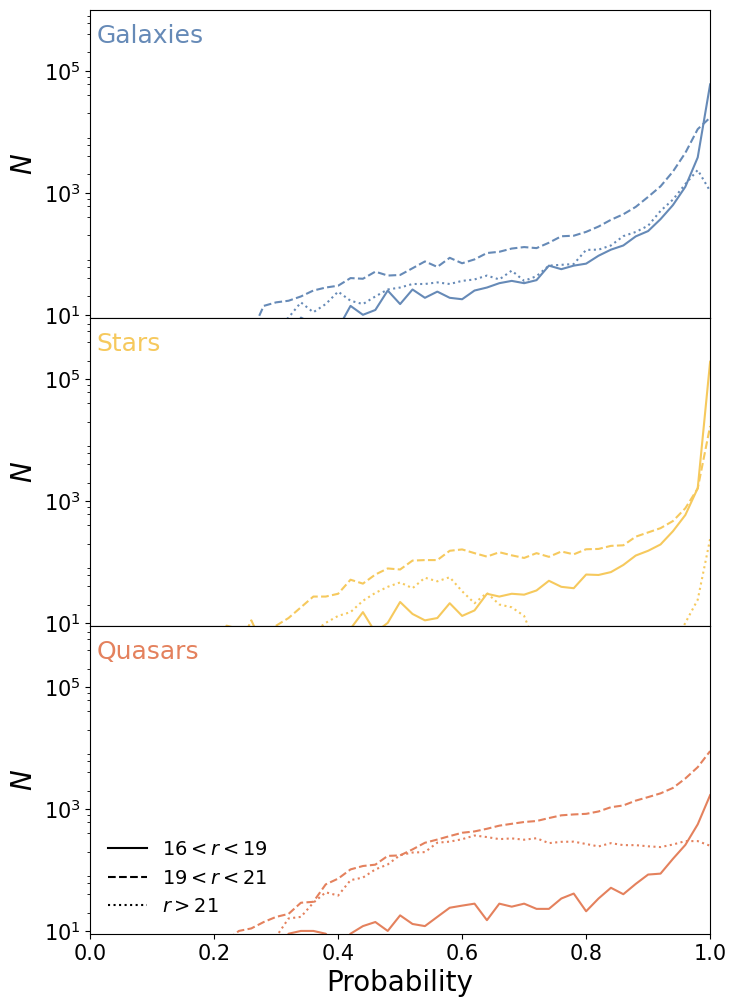

In [91]:
bins = np.linspace(0, 1, 51)
log = True
normed = False
alpha = 0.9
alpha1 = 0.5

y_gal_r1, binEdges_gal_r1 = np.histogram(xgboost_prob_r1[:, 0][vec_r1 == 0], bins=bins)
#bincenters_gal_r1 = 0.5 * (binEdges_gal_r1[1:] + binEdges_gal_r1[:-1])
bincenters_gal_r1 = (binEdges_gal_r1[1:])
y_gal_r2, binEdges_gal_r2 = np.histogram(xgboost_prob_r2[:, 0][vec_r2 == 0], bins=bins)
#bincenters_gal_r2 = 0.5 * (binEdges_gal_r2[1:] + binEdges_gal_r2[:-1])
bincenters_gal_r2 = binEdges_gal_r2[1:]
y_gal_r3, binEdges_gal_r3 = np.histogram(xgboost_prob_r3[:, 0][vec_r3 == 0], bins=bins)
#bincenters_gal_r3 = 0.5 * (binEdges_gal_r3[1:] + binEdges_gal_r3[:-1])
bincenters_gal_r3 = binEdges_gal_r3[1:]

y_star_r1, binEdges_star_r1 = np.histogram(xgboost_prob_r1[:, 1][vec_r1 == 1], bins=bins)
#bincenters_star_r1 = 0.5 * (binEdges_star_r1[1:] + binEdges_star_r1[:-1])
bincenters_star_r1 = binEdges_star_r1[1:]
y_star_r2, binEdges_star_r2 = np.histogram(xgboost_prob_r2[:, 1][vec_r2 == 1], bins=bins)
#bincenters_star_r2 = 0.5 * (binEdges_star_r2[1:] + binEdges_star_r2[:-1])
bincenters_star_r2 = binEdges_star_r2[1:]
y_star_r3, binEdges_star_r3 = np.histogram(xgboost_prob_r3[:, 1][vec_r3 == 1], bins=bins)
#bincenters_star_r3 = 0.5 * (binEdges_star_r3[1:] + binEdges_star_r3[:-1])
bincenters_star_r3 = binEdges_star_r3[1:]

y_qso_r1, binEdges_qso_r1 = np.histogram(xgboost_prob_r1[:, 2][vec_r1 == 2], bins=bins)
#bincenters_qso_r1 = 0.5 * (binEdges_qso_r1[1:] + binEdges_qso_r1[:-1])
bincenters_qso_r1 = binEdges_qso_r1[1:]
y_qso_r2, binEdges_qso_r2 = np.histogram(xgboost_prob_r2[:, 2][vec_r2 == 2], bins=bins)
#bincenters_qso_r2 = 0.5 * (binEdges_qso_r2[1:] + binEdges_qso_r2[:-1])
bincenters_qso_r2 = binEdges_qso_r2[1:]
y_qso_r3, binEdges_qso_r3 = np.histogram(xgboost_prob_r3[:, 2][vec_r3 == 2], bins=bins)
#bincenters_qso_r3 = 0.5 * (binEdges_qso_r3[1:] + binEdges_qso_r3[:-1])
bincenters_qso_r3 = binEdges_qso_r3[1:]

fig = plt.figure(figsize=(8, 20))
plt.subplots_adjust(hspace=0.001)

ax0 = plt.subplot(511)

ax0.semilogy(bincenters_gal_r1, y_gal_r1, color='#668ab7', linestyle='-')
ax0.semilogy(bincenters_gal_r2, y_gal_r2, color='#668ab7', linestyle='--')
ax0.semilogy(bincenters_gal_r3, y_gal_r3, color='#668ab7', linestyle=':')

ax0.set_xticks([])

ax0.set_xlim(0, 1)
ax0.set_ylim(9, 10**6)
ax0.set_ylabel(r'$N$',fontsize=20)
ax0.get_yaxis().set_tick_params(which='both', direction='out')
ax0.set_yticks([10**1, 10**3, 10**5])
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax0.yaxis.set_minor_locator(locmin)
ax0.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
#ax0.legend(loc='upper center',fontsize=15)
ax0.yaxis.set_tick_params(labelsize=15)

ax0.text(0.01,6*10**5,r'Galaxies',ha='left', va='top',color='#668ab7',fontsize=18)

ax1 = plt.subplot(512)

ax1.semilogy(bincenters_star_r1, y_star_r1, color='#f6c95d', linestyle='-')
ax1.semilogy(bincenters_star_r2, y_star_r2, color='#f6c95d', linestyle='--')
ax1.semilogy(bincenters_star_r3, y_star_r3, color='#f6c95d', linestyle=':')

ax1.set_xticks([])

ax1.set_xlim(0, 1)
ax1.set_ylim(9, 10**6)
ax1.set_ylabel(r'$N$',fontsize=20)
ax1.get_yaxis().set_tick_params(which='both', direction='out')
ax1.set_yticks([10**1, 10**3, 10**5])
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
#ax1.legend(loc='upper center',fontsize=15)
ax1.yaxis.set_tick_params(labelsize=15)

ax1.text(0.01,6*10**5,r'Stars',ha='left', va='top',color='#f6c95d',fontsize=18)

ax2 = plt.subplot(513)

ax2.semilogy(bincenters_qso_r1, y_qso_r1, color='#e4815d', linestyle='-')
ax2.semilogy(bincenters_qso_r2, y_qso_r2, color='#e4815d', linestyle='--')
ax2.semilogy(bincenters_qso_r3, y_qso_r3, color='#e4815d', linestyle=':')

ax2.set_xlim(0, 1)
ax2.set_ylim(9, 10**6)
ax2.set_xlabel(r'Probability',fontsize=20)
ax2.set_ylabel(r'$N$',fontsize=20)
ax2.get_yaxis().set_tick_params(which='both', direction='out')
ax2.set_yticks([10**1, 10**3, 10**5])
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax2.yaxis.set_minor_locator(locmin)
ax2.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
#ax2.legend(loc='upper center',fontsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.set_xticks([0,0.2,0.4,0.6,0.8,1])
ax2.xaxis.set_tick_params(labelsize=15)

ax2.text(0.01,6*10**5,r'Quasars',ha='left', va='top',color='#e4815d',fontsize=18)

ax2.plot(np.arange(2,3,.1),np.arange(2,3,.1), color='k', linestyle='-',label=r'$16<r<19$')
ax2.plot(np.arange(2,3,.1),np.arange(2,3,.1), color='k', linestyle='--',label=r'$19<r<21$')
ax2.plot(np.arange(2,3,.1),np.arange(2,3,.1), color='k', linestyle=':', label=r'$r>21$')

#ax2.legend(loc='upper right', fontsize=14)
ax2.legend(loc='lower left', fontsize=14, frameon=False)

plt.savefig('figs/prob_train.pdf', bbox_inches='tight')
#plt.close()

Figure B1:

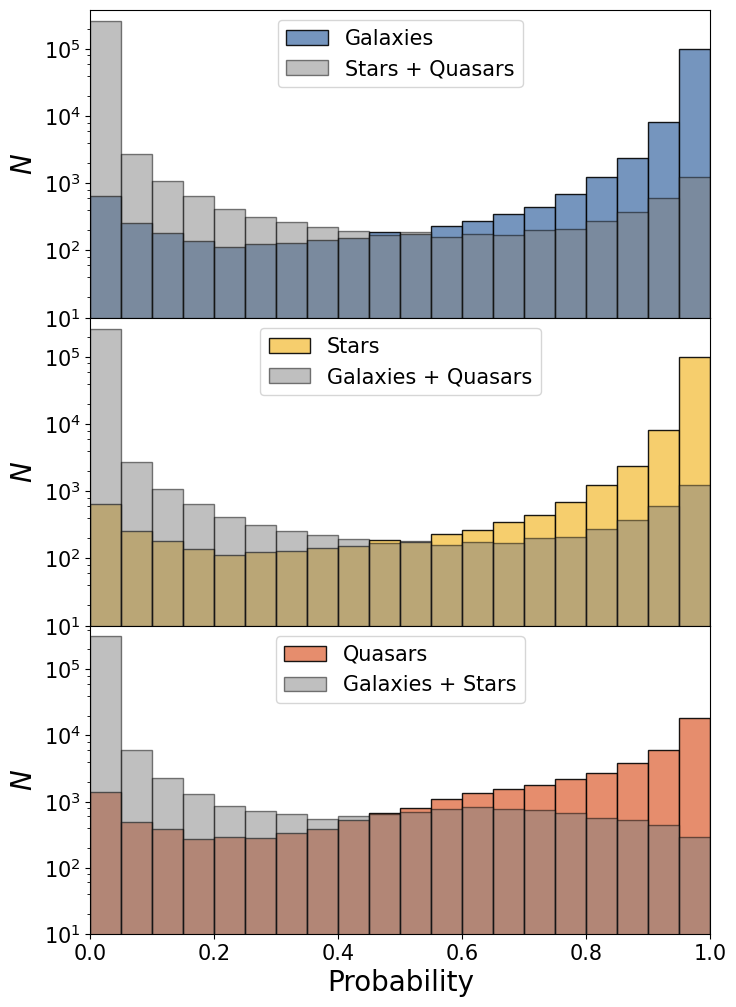

In [92]:
bins = np.linspace(0, 1, 21)
log = True
normed = False
alpha = 0.9
alpha1 = 0.5

ylim_upper = 10**4

fig = plt.figure(figsize=(8, 20))
plt.subplots_adjust(hspace=0.001)

ax0 = plt.subplot(511)
ax0.hist(xgboost_prob[:, 0][y_test_ohe[:, 0] == 1], bins=bins, log=log, edgecolor='black', label='Galaxies', alpha=alpha, color='#668ab7')
ax0.hist(xgboost_prob[:, 0][y_test_ohe[:, 0] == 0], bins=bins, log=log, edgecolor='black', label='Stars + Quasars', alpha=alpha1, color='gray')
ax0.set_xticks([])

#ax0.legend(loc='upper center')
ax0.set_xlim(0, 1)
#ax0.set_ylim(1, ylim_upper)
ax0.set_ylabel(r'$N$',fontsize=20)
ax0.get_yaxis().set_tick_params(which='both', direction='out')
#ax0.text(.5,.8,'XGB',horizontalalignment='center', fontsize=12, transform=ax0.transAxes)
ax0.set_yticks([10**1, 10**2, 10**3, 10**4, 10**5])
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax0.yaxis.set_minor_locator(locmin)
ax0.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax0.legend(loc='upper center',fontsize=15)
ax0.yaxis.set_tick_params(labelsize=15)



ax1 = plt.subplot(512)
ax1.hist(xgboost_prob[:, 0][y_test_ohe[:, 0] == 1], bins=bins, log=log, edgecolor='black', label='Stars', alpha=alpha, color='#f6c95d')
ax1.hist(xgboost_prob[:, 0][y_test_ohe[:, 0] == 0], bins=bins, log=log, edgecolor='black', label='Galaxies + Quasars', alpha=alpha1, color='gray')
ax1.set_xticks([])

#ax1.legend(loc='upper center')
ax1.set_xlim(0, 1)
#ax1.set_ylim(1, ylim_upper)
ax1.set_ylabel(r'$N$',fontsize=20)
ax1.get_yaxis().set_tick_params(which='both', direction='out')
#ax1.text(.5,.8,'XGB',horizontalalignment='center', fontsize=12, transform=ax1.transAxes)
ax1.set_yticks([10**1, 10**2, 10**3, 10**4, 10**5])
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax1.legend(loc='upper center',fontsize=15)
ax1.yaxis.set_tick_params(labelsize=15)




ax2 = plt.subplot(513)
ax2.hist(xgboost_prob[:, 2][y_test_ohe[:, 2] == 1], bins=bins, log=log, edgecolor='black', label='Quasars', alpha=alpha, color='#e4815d')
ax2.hist(xgboost_prob[:, 2][y_test_ohe[:, 2] == 0], bins=bins, log=log, edgecolor='black', label='Galaxies + Stars', alpha=alpha1, color='gray')
#ax2.legend(loc='upper center')
ax2.set_xlim(0, 1)
#ax2.set_ylim(1, ylim_upper)
ax2.set_ylabel(r'$N$',fontsize=20)
ax2.get_yaxis().set_tick_params(which='both', direction='out')
#ax2.text(.5,.8,'XGB', horizontalalignment='center', fontsize=12,transform=ax2.transAxes)
ax2.set_yticks([10**1, 10**2, 10**3, 10**4, 10**5])
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax2.yaxis.set_minor_locator(locmin)
ax2.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax2.legend(loc='upper center',fontsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.set_xticks([0,0.2,0.4,0.6,0.8,1])
ax2.xaxis.set_tick_params(labelsize=15)



xticklabels =  ax0.get_xticklabels() + ax1.get_xticklabels() + ax2.get_xticklabels() 
plt.setp(xticklabels, visible=True)
#fig.suptitle('Histogram Probability Morpho HSC')
plt.xlabel('Probability',fontsize=20)
#plt.savefig('../figs/hist_prob.pdf', bbox_inches='tight')
plt.show()
plt.close()